# IMPORT

In [1]:
!pip install autocorrect
!pip install symspellpy jamo hangul_utils
!pip install transformers
!pip install preprocess
!pip install contractions
!pip install symspellpy
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=d994f5d953c23e95cc55d7889d3bb0620741a39ea9c020ae2e000838e8b5280a
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect
Requested hangul_utils from https://files.pythonhosted.org/packages/b8/af/9e1beb71959c171d0dfbdd16e475a3ef45bc4bb4b5fd3d5816aad1c46c3c/hangul_utils-0.4.5-py3-none-any.whl has invalid metadata: Expected matching RIGHT_PARENTHESIS for LEFT_PARENTHESIS, after version specifier
    mecab-python (==0.996-ko-0.9.2)
                 ~~~~~~~~^
Please use pip<24.1 if you need to use this version.
Requested hangul_utils from https://files.pythonhosted.org/packages/26/cf/3347a5fa6512dc05a6b840a77fb6067ff89a87587d141959b80c26518208/hangul_utils-0.4.4-py3-none-any.whl has invalid met

In [2]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pickle import dump, load
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
import warnings
import matplotlib.dates as mdates

# Ignore warnings
warnings.filterwarnings("ignore")

# NLTK and other libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import requests
import contractions
import spacy
import tqdm

# Additional imports
import transformers
from transformers import BertTokenizer, BertModel, get_linear_schedule_with_warmup

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Set up matplotlib date formatter
import matplotlib.dates as mdates


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
!pip install --upgrade tensorflow


In [4]:
# Importing libraries
#import shap
import tensorflow as tf
import os
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
print(tf.__version__)



import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd
import tensorflow as tf
from dateutil import parser

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
#import shap
from matplotlib import pyplot
import csv
from datetime import datetime
#import keras_tuner

sns.set_style("dark")
plt.style.use("dark_background")
plt.rcParams['figure.facecolor'] = '#151934'
plt.rcParams['axes.facecolor'] = '#151934'
plt.rcParams.update({'axes.facecolor': '#151934'})
sns.set_palette('pastel')
sns.set_context('talk')
import pandas as pd
# Parse dates and set date column to index

import datetime
from datetime import date, time

# Create a function to plot time series data
def plot_time_series(timesteps, values, format='-', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("DJIA Stock Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae / mae_naive_no_season

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


import tensorflow as tf

def evaluate_preds(y_true, y_pred):
    # Ensure input tensors are of type float32
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Instantiate metrics
    mae_metric = tf.keras.metrics.MeanAbsoluteError()
    mse_metric = tf.keras.metrics.MeanSquaredError()
    mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()

    # Calculate metrics using update_state and result methods
    mae_metric.update_state(y_true, y_pred)
    mae = mae_metric.result().numpy()

    mse_metric.update_state(y_true, y_pred)
    mse = mse_metric.result().numpy()

    rmse = tf.sqrt(mse).numpy()

    mape_metric.update_state(y_true, y_pred)
    mape = mape_metric.result().numpy()

    mase = mean_absolute_scaled_error(y_true, y_pred).numpy()

    return {
        "mae": mae,
        "mse": mse,
        "rmse": rmse,
        "mape": mape,
        "mase": mase
    }

# Example use
# naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
# naive_results



2.17.0


In [296]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#from tensorflow.keras.layers.experimental import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import inflect
import random
from keras.layers import Input, Dense, Reshape
from keras.models import Model
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Flatten, Input, Concatenate
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential

# FILE PATH

In [17]:
def generate_random_values(start_time, end_time, num_points):
    time_series = np.random.uniform(start_time, end_time, num_points)
    return time_series

In [18]:
def generate_text_data(time_series):
    p = inflect.engine()
    text_data = []

    for i in range(0, len(time_series)):
        diff = time_series[i] - time_series[i-1]
        diff_text = p.number_to_words(abs(diff))  # Convert the difference to text

        if diff > 0:
            text = f"The value increases by {diff_text}"
            if random.random() > 0.5:
                text = f"Now it is larger by {diff_text}."
        elif diff < 0:
            text = f"The value decreases by {diff_text}"
            if random.random() > 0.5:
                text = f"Now it is smaller by {diff_text}."
        else:
            text = "The value remains unchanged"

        text_data.append(text)

    return text_data



In [19]:
def generate_text_embeddings(text_data):
    # Initialize the text vectorization layer
    text_vectorizer = preprocessing.TextVectorization(output_mode="int")

    # Adapt the text vectorization layer to the text data
    text_vectorizer.adapt(text_data)

    # Convert text data to text embeddings
    text_embeddings = text_vectorizer(text_data)

    return text_embeddings

In [20]:
# batch_size is set to 8, 16, 32.., which determines the number of samples processed in each training iteration.
batch_size = 512

# latent_dim is set to 100, representing the dimensionality of the latent space used in the model.
latent_dim = 100

# vocab_size is set to 27, indicating the size of the vocabulary for text embeddings.
vocab_size = 27

# embedding_dim is set to 27, representing the dimensionality of the text embeddings.
embedding_dim = 26


In [15]:
!pip install inflect



In [22]:
import inflect
import random

def generate_text_data(time_series):
    p = inflect.engine()
    text_data = []

    for i in range(len(time_series)):
        # Handle the first element separately
        if i == 0:
            text_data.append("This is the starting value.")
            continue

        # Calculate the difference from the previous value
        diff = time_series[i] - time_series[i-1]
        diff_text = p.number_to_words(abs(diff))  # Convert the difference to text

        # Generate text based on the difference
        if diff > 0:
            text_options = [
                f"The value increases by {diff_text}.",
                f"Now it is larger by {diff_text}."
            ]
        elif diff < 0:
            text_options = [
                f"The value decreases by {diff_text}.",
                f"Now it is smaller by {diff_text}."
            ]
        else:
            text_options = [
                "The value remains unchanged."
            ]

        # Randomly select from text options for variation
        text_data.append(random.choice(text_options))

    return text_data


In [60]:
from tensorflow.keras.layers import TextVectorization

def generate_text_embeddings(text_data):
    # Initialize the text vectorization layer
    text_vectorizer = TextVectorization(output_mode="int")

    # Adapt the text vectorization layer to the text data
    text_vectorizer.adapt(text_data)

    # Convert text data to text embeddings
    text_embeddings = text_vectorizer(text_data)

    return text_embeddings


In [61]:
start_time = 0
end_time = 1
num_points = 1000

time_series = generate_random_values(start_time, end_time, num_points)

text_data = generate_text_data(time_series)

text_embeddings = generate_text_embeddings(text_data)


# Create a DataFrame from the time series data
df = pd.DataFrame({'Time': np.linspace(start_time, end_time, num_points), 'Value': time_series, "Text": text_data})

print(df.head())

       Time     Value                                               Text
0  0.000000  0.789621                        This is the starting value.
1  0.001001  0.036138  Now it is smaller by zero point seven five thr...
2  0.002002  0.917320  Now it is larger by zero point eight eight one...
3  0.003003  0.922257  Now it is larger by zero point zero zero four ...
4  0.004004  0.561247  The value decreases by zero point three six on...


In [32]:
# Only want closing price for each day
prices = pd.DataFrame(df["Value"]).rename(columns={"Close": "Price"})
prices.head()

Value
0  0.021155
1  0.525736
2  0.444539
3  0.415279
4  0.143453

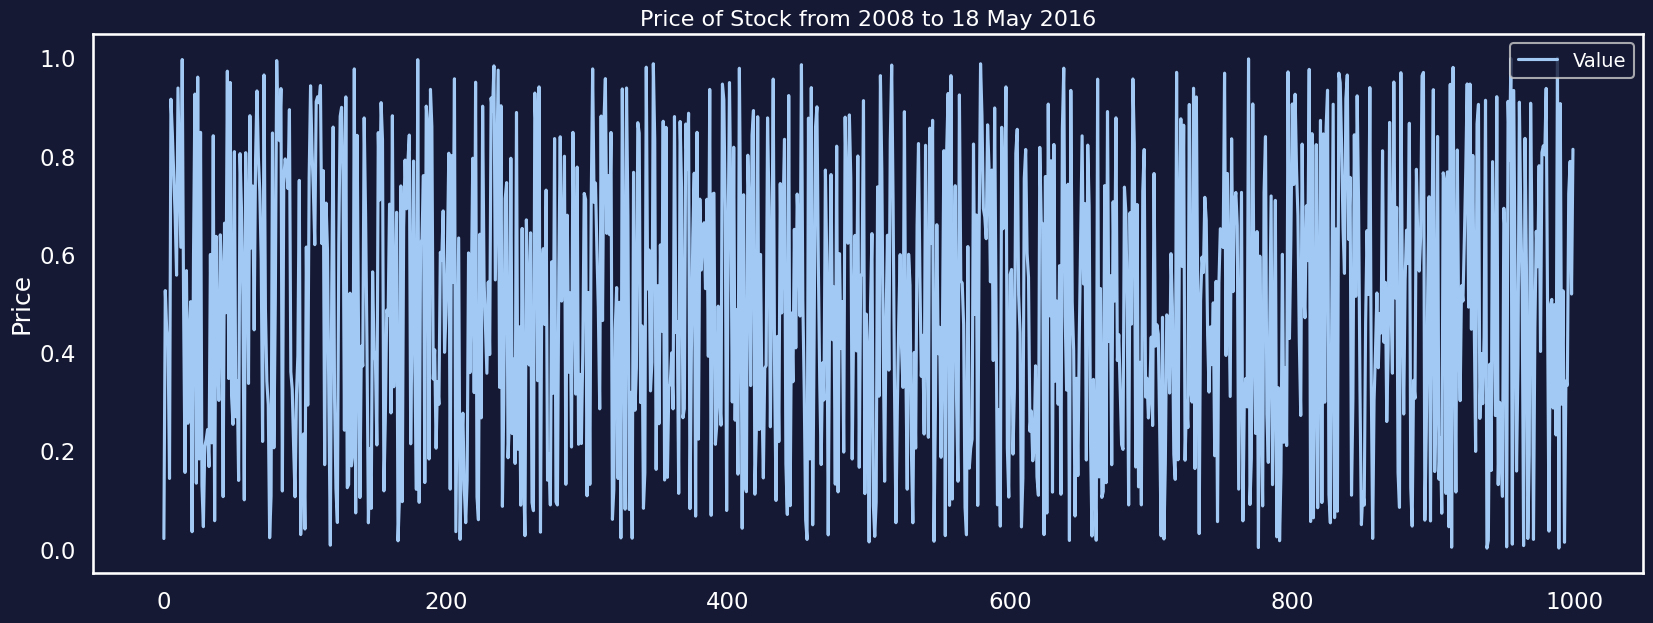

In [33]:
import matplotlib.pyplot as plt
prices.plot(figsize=(20, 7))
plt.ylabel("Price")
plt.title("Price of Stock from 2008 to 18 May 2016", fontsize=16)
plt.legend(fontsize=14);

In [34]:
#Drop NaN Values
df = df.dropna()

# Rename 'Value' column to 'Price'
df = df.rename(columns={"Value": "Close"})

# Display the updated DataFrame
df.head()

Time     Close                                               Text
0  0.000000  0.021155                        This is the starting value.
1  0.001001  0.525736  The value increases by zero point five zero fo...
2  0.002002  0.444539  The value decreases by zero point zero eight o...
3  0.003003  0.415279  The value decreases by zero point zero two nin...
4  0.004004  0.143453  Now it is smaller by zero point two seven one ...

In [38]:
# Remove the 'Time' and 'Text' columns
df = df.drop(columns=["Time", "Text"])

# Display the updated DataFrame
df.head()

Close
0  0.021155
1  0.525736
2  0.444539
3  0.415279
4  0.143453

In [39]:
df_1 = df
WINDOW_SIZE = 1
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = df_1.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Close+{i+1}"] = bitcoin_prices_windowed["Close"].shift(periods=i+1)
bitcoin_prices_windowed = bitcoin_prices_windowed.dropna()
#bitcoin_prices_windowed[f"c+{-1}"] = bitcoin_prices_windowed["c"].shift(periods=-1)

#Close

bitcoin_prices_windowed[f"Close	+{-1}"] = bitcoin_prices_windowed["Close"].shift(periods=-1)
bitcoin_prices_windowed.rename(columns={'Close\t+-1': 'Close Price'}, inplace=True)

#bitcoin_prices_windowed.rename(columns={'c+-1': 'Close'}, inplace=True)

In [40]:
bitcoin_prices_windowed.head(5)

Close   Close+1  Close Price
1  0.525736  0.021155     0.444539
2  0.444539  0.525736     0.415279
3  0.415279  0.444539     0.143453
4  0.143453  0.415279     0.915293
5  0.915293  0.143453     0.845980

In [41]:
bitcoin_prices_windowed.tail(5)

Close   Close+1  Close Price
995  0.332786  0.341661     0.723101
996  0.723101  0.332786     0.788745
997  0.788745  0.723101     0.518800
998  0.518800  0.788745     0.813329
999  0.813329  0.518800          NaN

In [42]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Close Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Close Price"].astype(np.float32)
X.head()


Close   Close+1
1  0.525736  0.021155
2  0.444539  0.525736
3  0.415279  0.444539
4  0.143453  0.415279
5  0.915293  0.143453

In [43]:
y.head(5)

1    0.444539
2    0.415279
3    0.143453
4    0.915293
5    0.845980
Name: Close Price, dtype: float32

In [44]:

split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)


(798, 798, 200, 200)

In [45]:
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test  = X_test.to_numpy()
y_test  = y_test.to_numpy()


In [46]:
bitcoin_prices_windowed

Close   Close+1  Close Price
1    0.525736  0.021155     0.444539
2    0.444539  0.525736     0.415279
3    0.415279  0.444539     0.143453
4    0.143453  0.415279     0.915293
5    0.915293  0.143453     0.845980
..        ...       ...          ...
995  0.332786  0.341661     0.723101
996  0.723101  0.332786     0.788745
997  0.788745  0.723101     0.518800
998  0.518800  0.788745     0.813329
999  0.813329  0.518800          NaN

[999 rows x 3 columns]

In [47]:
# Convert data to integers
X_all = bitcoin_prices_windowed.drop(["Close Price"], axis=1).dropna().to_numpy().astype(int)
y_all = bitcoin_prices_windowed.dropna()["Close Price"].to_numpy().astype(int)

# Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE = 16
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 2), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [48]:
X_all

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [49]:
last_window = X_all[-1:]
last_window.shape[1]

2

In [50]:
# How many timesteps to predict into the future?
INTO_FUTURE = 1 # since our Bitcoin data is daily, this is for 14 days

In [51]:
future_forecast = []
last_window = X_all[-1:]

In [52]:
last_window

array([[0, 0]])

# CNN

In [53]:
split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(798, 798, 200, 200)

In [55]:
# Check shapes
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')


x_train shape: (798, 2)
x_test shape: (200, 2)


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(x_train_aligned.shape[1], 1)))  # Adjust kernel_size
model.add(MaxPooling1D(pool_size=1))  # Adjust pool_size
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', padding='same'))  # Adjust kernel_size
model.add(MaxPooling1D(pool_size=1))  # Adjust pool_size
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Adjusted learning rate
learning_rate = 0.0001

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
history = model.fit(x_train_reshaped, y_train_aligned, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test_reshaped, y_test_aligned)
print(f'Test Mean Absolute Error: {test_mae}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0947 - mae: 0.2673
Test Mean Absolute Error: 0.2637019753456116


Test Mean Absolute Error: 0.2637


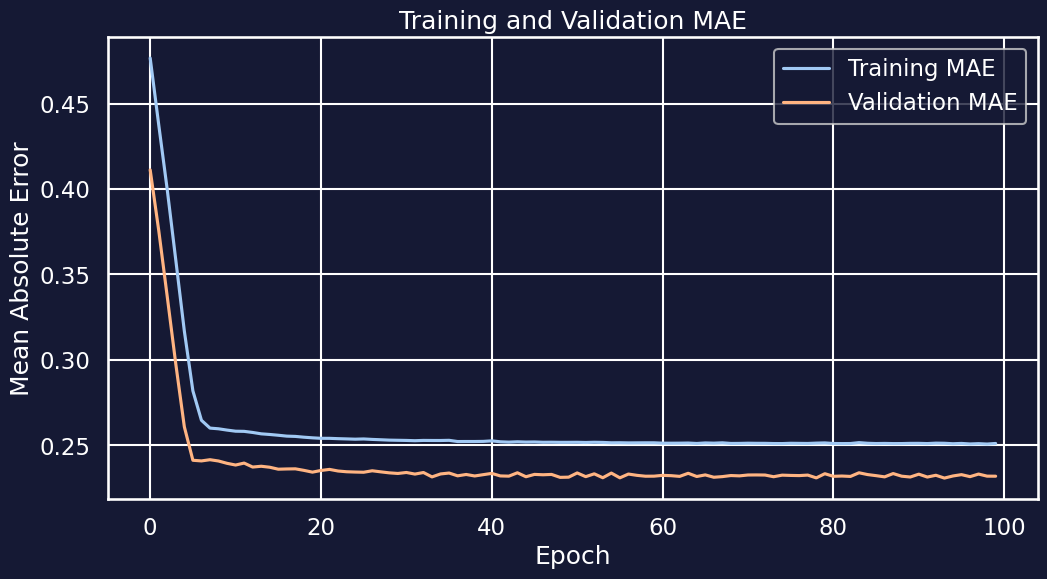

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


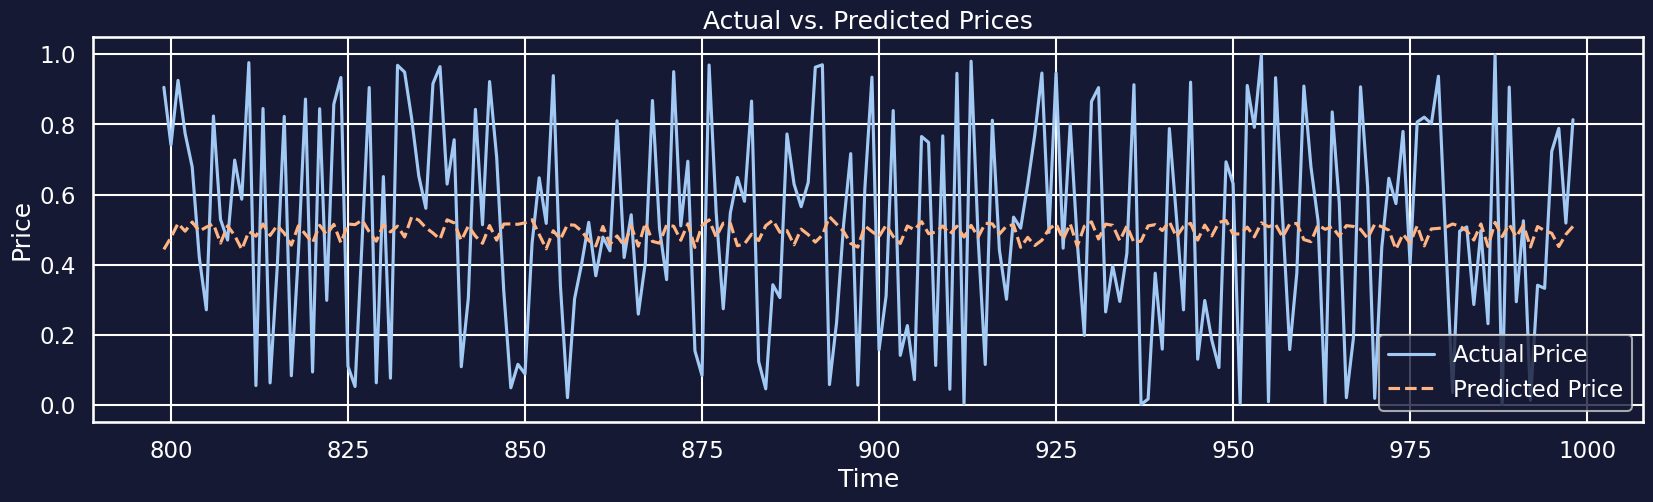

In [57]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test_reshaped, y_test_aligned, verbose=0)
print(f'Test Mean Absolute Error: {test_mae:.4f}')

# Plot training history (optional)
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.grid(True)
plt.show()

# Make predictions on the test set
predictions = model.predict(x_test_reshaped)

# Ensure predictions and true values are 1-dimensional arrays
predictions = predictions.flatten()
y_test_aligned_flat = y_test_aligned[:len(predictions)].to_numpy().flatten()

# Define a function to plot time series
def plot_time_series(time, values, format="-", label=None):
    plt.plot(time, values, format, label=label)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Actual vs. Predicted Prices')
    if label:
        plt.legend()

# Plot future price predictions
plt.figure(figsize=(20, 5))
plot_time_series(y_test_aligned.index[:len(predictions)], y_test_aligned_flat, format="-", label="Actual Price")
plot_time_series(y_test_aligned.index[:len(predictions)], predictions, format="--", label="Predicted Price")
plt.grid(True)
plt.show()


CNN Model Results: {'mae': 0.26370198, 'mse': 0.09364502, 'rmse': 0.30601475, 'mape': 643.1459, 'mase': 0.7190825}
Model Results DataFrame:
                  mae        mape      mase       mse      rmse
CNN_results  0.263702  643.145874  0.719082  0.093645  0.306015


<Figure size 500x500 with 0 Axes>

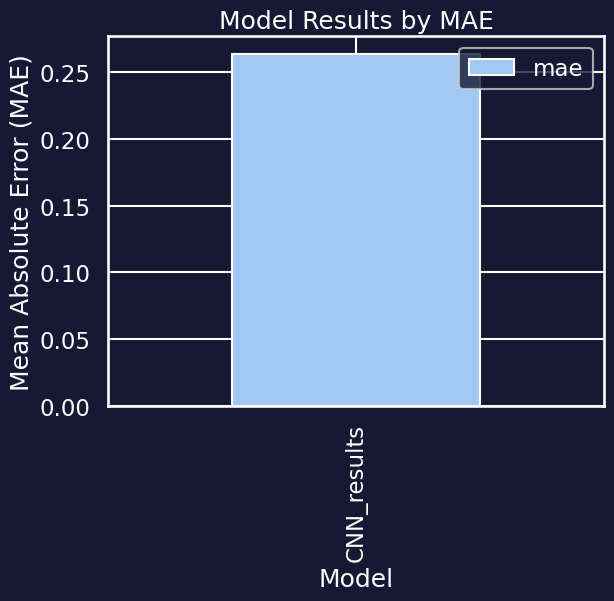

In [58]:
CNN_model_results = evaluate_preds(y_true=y_test_aligned_flat, y_pred=predictions)
print("CNN Model Results:", CNN_model_results)

# Compare different model results (e.g., w = window size, h = horizon)
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results
}).T

print("Model Results DataFrame:")
print(model_results)

# Sort model results by MAE and plot them
plt.figure(figsize=(5, 5))
model_results[["mae"]].sort_values(by="mae").plot(kind="bar")
plt.title("Model Results by MAE")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(True)
plt.show()

# Clean Text data

In [163]:
df

# Drop the 'Time' column
df = df.drop(columns=['Time'])

df

Value                                               Text
0    0.789621                        This is the starting value.
1    0.036138  Now it is smaller by zero point seven five thr...
2    0.917320  Now it is larger by zero point eight eight one...
3    0.922257  Now it is larger by zero point zero zero four ...
4    0.561247  The value decreases by zero point three six on...
..        ...                                                ...
995  0.942517  The value increases by zero point two six one ...
996  0.506154  The value decreases by zero point four three s...
997  0.991207  The value increases by zero point four eight f...
998  0.474309  The value decreases by zero point five one six...
999  0.997456  Now it is larger by zero point five two three ...

[1000 rows x 2 columns]

In [185]:
sent_df = df.copy()

data1_new = sent_df


In [186]:
data1_new.head(2)

Value                                               Text
0  0.789621                        This is the starting value.
1  0.036138  Now it is smaller by zero point seven five thr...

In [187]:
final_df = data1_new

In [188]:
data =final_df

In [190]:
data['MA7'] = data.iloc[:,0].rolling(window=7).mean() #Close column
data['MA20'] = data.iloc[:,0].rolling(window=20).mean() #Close Column
#data['MACD'] = data.iloc[:,0].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()
    #This is the difference of Closing price and Opening Price

    # Create Bollinger Bands
data['20SD'] = data.iloc[:, 0].rolling(20).std()
data['upper_band'] = data['MA20'] + (data['20SD'] * 2)
data['lower_band'] = data['MA20'] - (data['20SD'] * 2)

    # Create Exponential moving average
data['EMA'] = data.iloc[:,0].ewm(com=0.5).mean()

In [191]:
data

Value                                               Text       MA7  \
0    0.789621                        This is the starting value.       NaN   
1    0.036138  Now it is smaller by zero point seven five thr...       NaN   
2    0.917320  Now it is larger by zero point eight eight one...       NaN   
3    0.922257  Now it is larger by zero point zero zero four ...       NaN   
4    0.561247  The value decreases by zero point three six on...       NaN   
..        ...                                                ...       ...   
995  0.942517  The value increases by zero point two six one ...  0.641751   
996  0.506154  The value decreases by zero point four three s...  0.610198   
997  0.991207  The value increases by zero point four eight f...  0.686553   
998  0.474309  The value decreases by zero point five one six...  0.650703   
999  0.997456  Now it is larger by zero point five two three ...  0.780034   

         MA20      20SD  upper_band  lower_band       EMA  
0         NaN       NaN         NaN         NaN  0.789621  
1         NaN       NaN         NaN         NaN  0.224508  
2         NaN       NaN         NaN         NaN  0.704147  
3         NaN       NaN         NaN         NaN  0.851371  
4         NaN       NaN         NaN         NaN  0.657155  
..        ...       ...         ...         ...       ...  
995  0.510262  0.333085    1.176431   -0.155907  0.854387  
996  0.528910  0.321088    1.171085   -0.113265  0.622232  
997  0.546076  0.336587    1.219250   -0.127097  0.868215  
998  0.550956  0.334704    1.220365   -0.118452  0.605611  
999  0.591865  0.336879    1.265623   -0.081893  0.866841  

[1000 rows x 8 columns]

In [192]:
data = data.dropna()

In [193]:
data1_new = data

In [194]:
final_spell = data1_new[["Text"]]

In [195]:
final_df = data1_new[['Value']]

In [196]:
final_df

Value
19   0.768835
20   0.829765
21   0.555734
22   0.760108
23   0.454009
..        ...
995  0.942517
996  0.506154
997  0.991207
998  0.474309
999  0.997456

[981 rows x 1 columns]

In [197]:
final = final_df

In [198]:
final.head(5)

Value
19  0.768835
20  0.829765
21  0.555734
22  0.760108
23  0.454009

In [199]:
final = final.dropna()

In [200]:
training_news = final_spell

In [201]:
training_news

Text
19   The value increases by zero point two seven tw...
20   Now it is larger by zero point zero six zero n...
21   Now it is smaller by zero point two seven four...
22   The value increases by zero point two zero fou...
23   Now it is smaller by zero point three zero six...
..                                                 ...
995  The value increases by zero point two six one ...
996  The value decreases by zero point four three s...
997  The value increases by zero point four eight f...
998  The value decreases by zero point five one six...
999  Now it is larger by zero point five two three ...

[981 rows x 1 columns]

In [202]:
split_size = int(len(final_spell) * 0.8)
split_size


784

In [203]:
train_news = training_news[:split_size]


In [204]:
len(train_news)


784

In [207]:
len(training_news)

981

In [208]:
len(final_spell)

981

In [209]:
split_size = int(len(final_spell) * 0.8)
split_size

784

In [210]:
train_news = training_news[:800]
train_news.head(5)

Text
19  The value increases by zero point two seven tw...
20  Now it is larger by zero point zero six zero n...
21  Now it is smaller by zero point two seven four...
22  The value increases by zero point two zero fou...
23  Now it is smaller by zero point three zero six...

In [211]:
len(train_news)

800

In [212]:
test_news = training_news[split_size:]
test_news.head(5)

Text
803  Now it is smaller by zero point zero two four ...
804  The value decreases by zero point two zero two...
805  Now it is smaller by zero point five seven two...
806  Now it is larger by zero point five eight two ...
807  Now it is smaller by zero point four one five ...

In [213]:
test_news.tail(5)

Text
995  The value increases by zero point two six one ...
996  The value decreases by zero point four three s...
997  The value increases by zero point four eight f...
998  The value decreases by zero point five one six...
999  Now it is larger by zero point five two three ...

In [216]:
data

Value                                               Text       MA7  \
19   0.768835  The value increases by zero point two seven tw...  0.422776   
20   0.829765  Now it is larger by zero point zero six zero n...  0.505202   
21   0.555734  Now it is smaller by zero point two seven four...  0.512039   
22   0.760108  The value increases by zero point two zero fou...  0.618394   
23   0.454009  Now it is smaller by zero point three zero six...  0.559506   
..        ...                                                ...       ...   
995  0.942517  The value increases by zero point two six one ...  0.641751   
996  0.506154  The value decreases by zero point four three s...  0.610198   
997  0.991207  The value increases by zero point four eight f...  0.686553   
998  0.474309  The value decreases by zero point five one six...  0.650703   
999  0.997456  Now it is larger by zero point five two three ...  0.780034   

         MA20      20SD  upper_band  lower_band       EMA  
19   0.529948  0.313771    1.157491   -0.097595  0.649855  
20   0.531955  0.315643    1.163241   -0.099330  0.769795  
21   0.557935  0.293276    1.144487   -0.028617  0.627088  
22   0.550074  0.285130    1.120335   -0.020186  0.715768  
23   0.526662  0.271878    1.070418   -0.017094  0.541262  
..        ...       ...         ...         ...       ...  
995  0.510262  0.333085    1.176431   -0.155907  0.854387  
996  0.528910  0.321088    1.171085   -0.113265  0.622232  
997  0.546076  0.336587    1.219250   -0.127097  0.868215  
998  0.550956  0.334704    1.220365   -0.118452  0.605611  
999  0.591865  0.336879    1.265623   -0.081893  0.866841  

[981 rows x 8 columns]

In [218]:
X = data.drop(columns=['Value', 'Text'])
X

MA7      MA20      20SD  upper_band  lower_band       EMA
19   0.422776  0.529948  0.313771    1.157491   -0.097595  0.649855
20   0.505202  0.531955  0.315643    1.163241   -0.099330  0.769795
21   0.512039  0.557935  0.293276    1.144487   -0.028617  0.627088
22   0.618394  0.550074  0.285130    1.120335   -0.020186  0.715768
23   0.559506  0.526662  0.271878    1.070418   -0.017094  0.541262
..        ...       ...       ...         ...         ...       ...
995  0.641751  0.510262  0.333085    1.176431   -0.155907  0.854387
996  0.610198  0.528910  0.321088    1.171085   -0.113265  0.622232
997  0.686553  0.546076  0.336587    1.219250   -0.127097  0.868215
998  0.650703  0.550956  0.334704    1.220365   -0.118452  0.605611
999  0.780034  0.591865  0.336879    1.265623   -0.081893  0.866841

[981 rows x 6 columns]

In [219]:
split_size = int(len(X) * 0.8)
train_news = training_news[:split_size]
train_news.head(5)

Text
19  The value increases by zero point two seven tw...
20  Now it is larger by zero point zero six zero n...
21  Now it is smaller by zero point two seven four...
22  The value increases by zero point two zero fou...
23  Now it is smaller by zero point three zero six...

In [220]:
test_news = training_news[split_size:]
test_news.head(5)

Text
803  Now it is smaller by zero point zero two four ...
804  The value decreases by zero point two zero two...
805  Now it is smaller by zero point five seven two...
806  Now it is larger by zero point five eight two ...
807  Now it is smaller by zero point four one five ...

In [221]:
X

MA7      MA20      20SD  upper_band  lower_band       EMA
19   0.422776  0.529948  0.313771    1.157491   -0.097595  0.649855
20   0.505202  0.531955  0.315643    1.163241   -0.099330  0.769795
21   0.512039  0.557935  0.293276    1.144487   -0.028617  0.627088
22   0.618394  0.550074  0.285130    1.120335   -0.020186  0.715768
23   0.559506  0.526662  0.271878    1.070418   -0.017094  0.541262
..        ...       ...       ...         ...         ...       ...
995  0.641751  0.510262  0.333085    1.176431   -0.155907  0.854387
996  0.610198  0.528910  0.321088    1.171085   -0.113265  0.622232
997  0.686553  0.546076  0.336587    1.219250   -0.127097  0.868215
998  0.650703  0.550956  0.334704    1.220365   -0.118452  0.605611
999  0.780034  0.591865  0.336879    1.265623   -0.081893  0.866841

[981 rows x 6 columns]

In [222]:
y = data[['Value']]
y

Value
19   0.768835
20   0.829765
21   0.555734
22   0.760108
23   0.454009
..        ...
995  0.942517
996  0.506154
997  0.991207
998  0.474309
999  0.997456

[981 rows x 1 columns]

In [223]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(784, 784, 197, 197)

In [224]:
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test  = X_test.to_numpy()
y_test  = y_test.to_numpy()

# GPT

In [225]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

In [226]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Concatenate
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import GPT2Tokenizer, TFGPT2Model

# Instantiate the GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = TFGPT2Model.from_pretrained("gpt2")




All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [227]:
corpus = train_news["Text"]

In [228]:
corpus_test = test_news["Text"]

In [229]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode text into token IDs
encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]

# Pad sequences to a specified length
max_length = 50  # Adjust this based on your requirements
padded_corpus_train = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')

# Print the first padded sequence
print("Padded Sequence:", padded_corpus_train[0])

Padded Sequence: [ 464 1988 5732  416 6632  966  734 3598  734 5193 1440 2237 1936 1936
 2237 1440 6632  734  734 2237 3624 3624 1440   13    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [230]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode text into token IDs
encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus_test]

# Pad sequences to a specified length
max_length = 50  # Adjust this based on your requirements
padded_corpus_test = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')

# Print the first padded sequence
print("Padded Sequence:", padded_corpus_test[0])

Padded Sequence: [3844  340  318 4833  416 6632  966 6632  734 1440 2237 1115 3598 2237
 1115 3624 2237 6632 1115 1115 5193 1440 1440 6632 3598   13    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [231]:
import numpy as np

# Assuming you have numerical features (X_train, X_test) and encoded text sequences (padded_corpus_train, padded_corpus_test)

# Merge numerical features and encoded text sequences for training set
x_train_combined = np.concatenate([x_train, padded_corpus_train], axis=1)

# Merge numerical features and encoded text sequences for testing set
#x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)

# Ensure the shapes are correct
print("Shape of x_train_combined:", x_train_combined.shape)
#print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_train_combined: (784, 56)


In [232]:
x_test

array([[ 0.68926506,  0.58088923,  0.2855455 ,  1.15198023,  0.00979823,
         0.93970711],
       [ 0.67427798,  0.592518  ,  0.28806718,  1.16865236,  0.01638363,
         0.82128584],
       [ 0.64936576,  0.5806247 ,  0.29992387,  1.18047245, -0.01922305,
         0.39989681],
       ...,
       [ 0.68655341,  0.54607647,  0.33658658,  1.21924964, -0.12709669,
         0.8682155 ],
       [ 0.65070306,  0.55095606,  0.33470425,  1.22036456, -0.11845245,
         0.60561106],
       [ 0.78003395,  0.59186489,  0.33687889,  1.26562268, -0.0818929 ,
         0.86684128]])

In [233]:
x_train_combined

array([[0.42277558, 0.52994799, 0.31377135, ..., 0.        , 0.        ,
        0.        ],
       [0.50520181, 0.53195517, 0.3156427 , ..., 0.        , 0.        ,
        0.        ],
       [0.51203862, 0.557935  , 0.29327616, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5096917 , 0.52808072, 0.24584689, ..., 0.        , 0.        ,
        0.        ],
       [0.62436258, 0.55190081, 0.25638031, ..., 0.        , 0.        ,
        0.        ],
       [0.62312586, 0.57021636, 0.27420357, ..., 0.        , 0.        ,
        0.        ]])

In [234]:
# Check the number of samples in each dataset
print("Number of samples in x_test:", x_test.shape[0])
print("Number of samples in padded_corpus_test:", padded_corpus_test.shape[0])

Number of samples in x_test: 197
Number of samples in padded_corpus_test: 197


In [235]:
min_samples = min(x_test.shape[0], padded_corpus_test.shape[0])

In [236]:
# Trim or pad the datasets
x_test = x_test[:min_samples]
padded_corpus_test = padded_corpus_test[:min_samples]

In [237]:
# Now, attempt the concatenation again
x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)

In [238]:
# Check the shape after concatenation
print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_test_combined: (197, 56)


In [239]:
import numpy as np

# Assuming you have numerical features (X_train, X_test) and encoded text sequences (padded_corpus_train, padded_corpus_test)

# Merge numerical features and encoded text sequences for training set
x_train_combined = np.concatenate([x_train, padded_corpus_train], axis=1)

# Merge numerical features and encoded text sequences for testing set
x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)

# Ensure the shapes are correct
print("Shape of x_train_combined:", x_train_combined.shape)
print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_train_combined: (784, 56)
Shape of x_test_combined: (197, 56)


In [240]:
combined_input_dim = 57



# keras with No text embedding

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0068 - mae: 0.0691
Test Mean Absolute Error: 0.06971673667430878


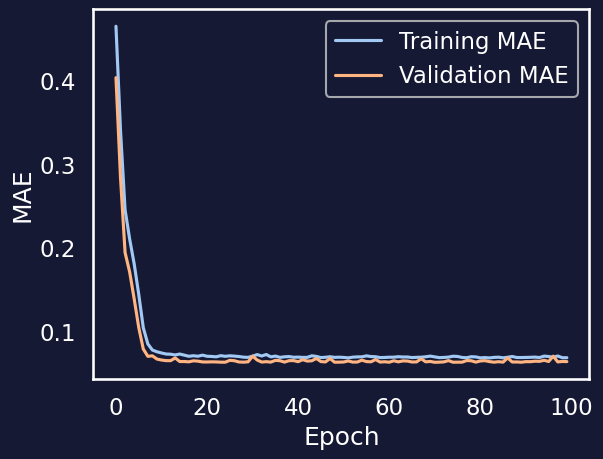

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068 - mae: 0.0691 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068 - mae: 0.0691 
Test Mean Absolute Error: 0.06971673667430878


{'mae': 0.06971674,
 'mse': 0.006856479,
 'rmse': 0.08280386,
 'mape': 55.96074,
 'mase': 0.20678322}

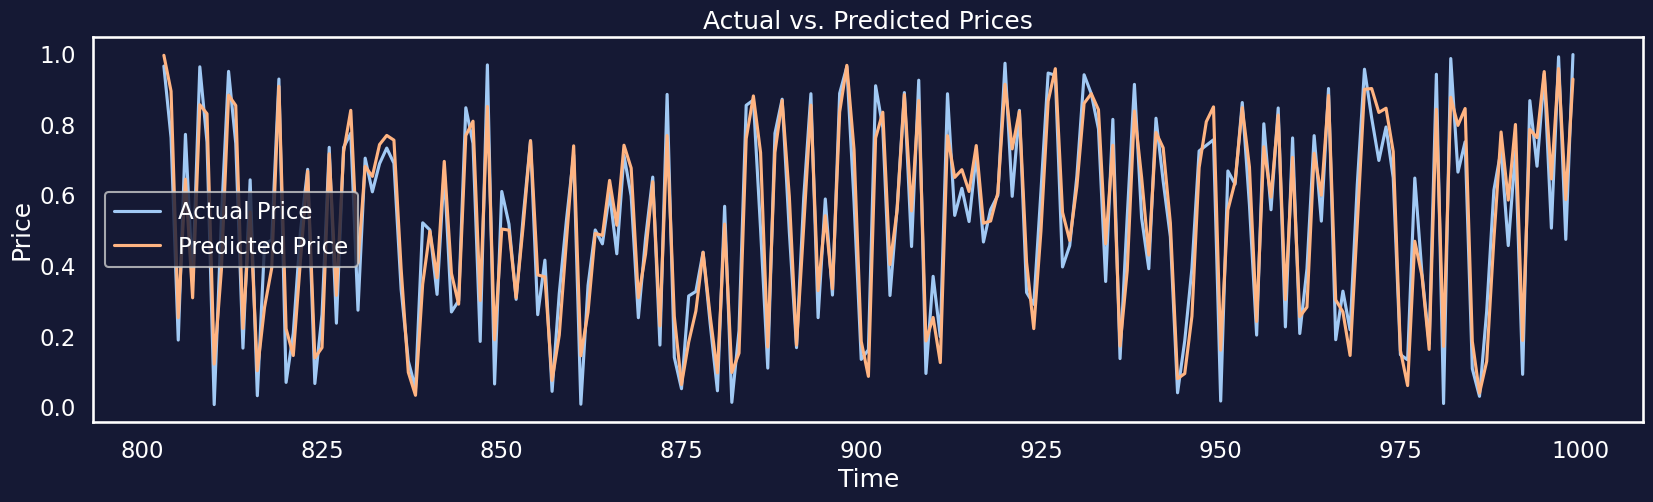

In [241]:
# prompt: build sequential model for no text embedding

# Define the model
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Use linear activation for regression

# Adjusted learning rate
learning_rate = 0.0001

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(x_test).flatten()

model.evaluate(x_test,y_test)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions, format="-", label="Predicted Price")
plt.grid(False)

# Flatten y_test
y_test_flat = y_test.to_numpy().flatten()

# Evaluate the model's predictions
model_results = evaluate_preds(y_true=y_test_flat, y_pred=predictions)
model_results


{'mae': 0.06971674, 'mse': 0.006856479, 'rmse': 0.08280386, 'mape': 55.96074, 'mase': 0.9445388}


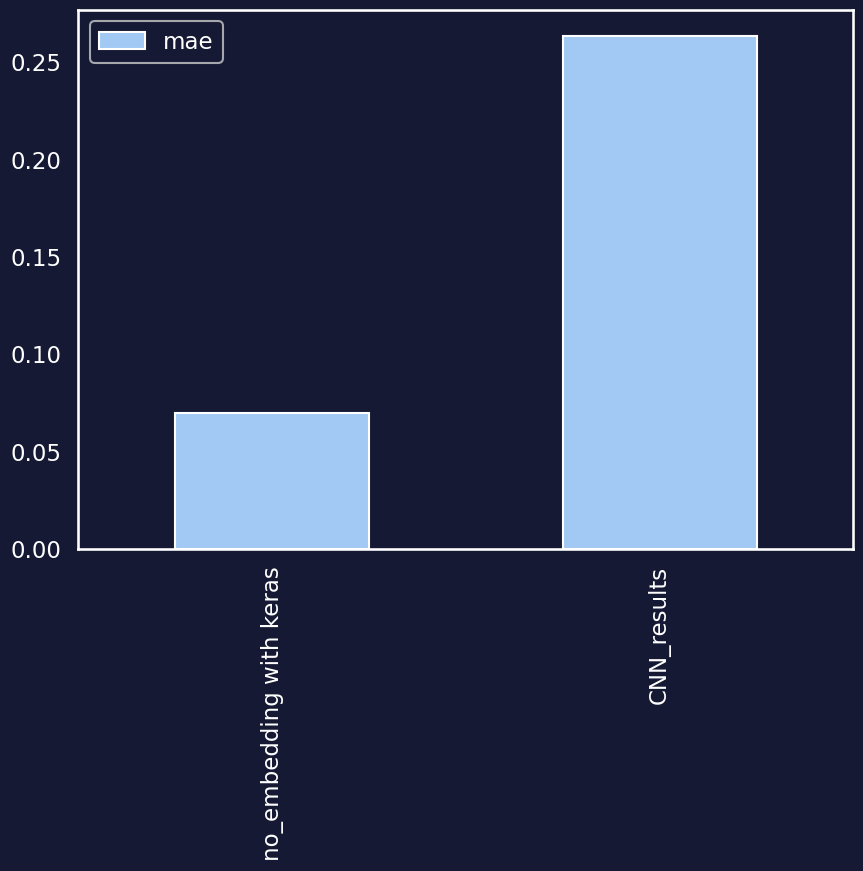

In [242]:
# Assuming evaluate_preds is a predefined function to evaluate predictions
model_results_no_embedding = evaluate_preds(y_true=y_test, y_pred=predictions)
print(model_results_no_embedding)

# Compare different model results (assuming naive_results, Keras_Sequential_Model_results, and CNN_model_results are predefined)
model_results = pd.DataFrame({"CNN_results": CNN_model_results,
                              "no_embedding with keras": model_results_no_embedding}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

# GPT2 with No text embedding

All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 515ms/step - loss: 0.3788 - mae: 0.5391 - val_loss: 0.2646 - val_mae: 0.4457
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.2529 - mae: 0.4147 - val_loss: 0.1824 - val_mae: 0.3641
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1678 - mae: 0.3378 - val_loss: 0.1191 - val_mae: 0.2949


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 699ms/step


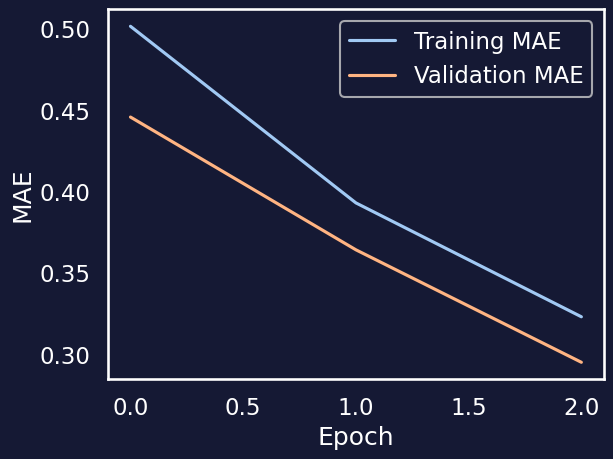

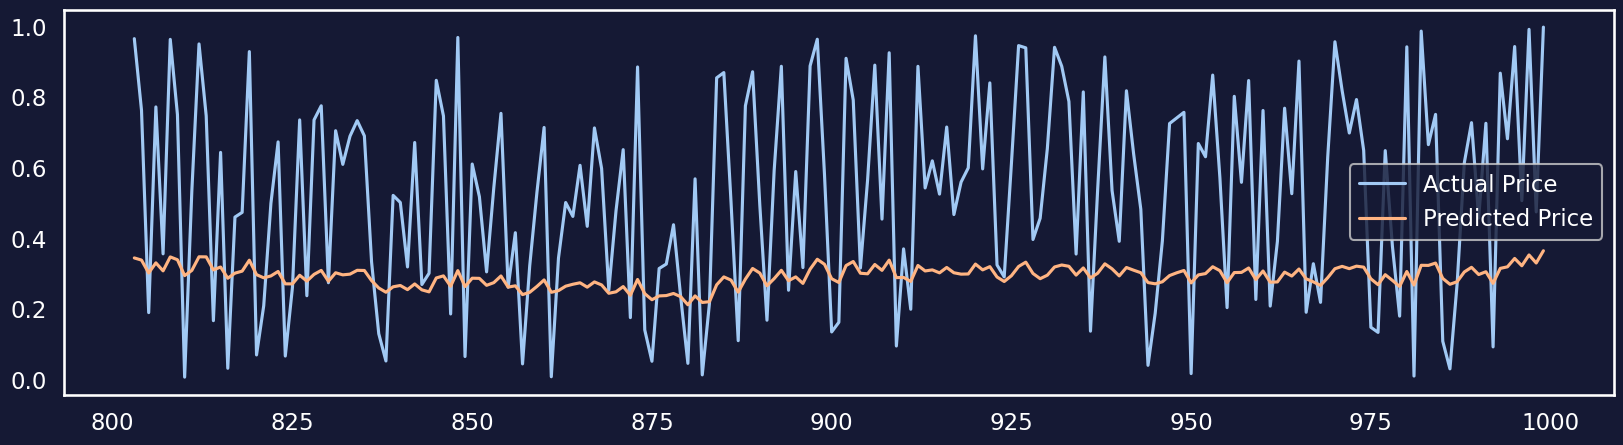

In [243]:
import tensorflow as tf
from transformers import GPT2Tokenizer, TFGPT2Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

# Load GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
gpt2_model = TFGPT2Model.from_pretrained(model_name)

# Tokenize and pad the text data (for both training and testing)
max_length = 50  # Max sequence length for GPT-2

# Assuming corpus and corpus_test are lists of text data
encoded_corpus_train = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]
encoded_corpus_test = [tokenizer.encode(text, add_special_tokens=True) for text in corpus_test]

padded_corpus_train = pad_sequences(encoded_corpus_train, maxlen=max_length, padding='post', truncating='post')
padded_corpus_test = pad_sequences(encoded_corpus_test, maxlen=max_length, padding='post', truncating='post')

# Create attention masks for the text data
attention_masks_train = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_train])
attention_masks_test = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_test])

# Define input shapes for numerical and text data
numerical_input_shape = X_train.shape[1]  # Based on the numerical input dimensions
text_input_shape = max_length

# Numerical input layer
numerical_input = Input(shape=(numerical_input_shape,), name="numerical_input")

# Text input layers
text_input_ids = Input(shape=(text_input_shape,), dtype=tf.int32, name="text_input_ids")
text_attention_masks = Input(shape=(text_input_shape,), dtype=tf.float32, name="text_attention_masks")

# Lambda function to use GPT-2 model
def get_gpt2_embeddings(inputs):
    input_ids, attention_mask = inputs
    gpt2_outputs = gpt2_model(input_ids, attention_mask=attention_mask)
    gpt2_embeddings = gpt2_outputs.last_hidden_state[:, 0, :]  # Take the [CLS] token embedding
    return gpt2_embeddings

# Wrap the GPT-2 model in a Lambda layer
gpt2_embeddings_layer = Lambda(get_gpt2_embeddings)([text_input_ids, text_attention_masks])

# Define a function to zero out embeddings
def zero_out_embeddings(embedding_tensor):
    return tf.zeros_like(embedding_tensor)

# Zero out embeddings
gpt2_embeddings_layer = Lambda(zero_out_embeddings)(gpt2_embeddings_layer)

# Concatenate numerical and text embeddings
combined_input = Concatenate()([numerical_input, gpt2_embeddings_layer])

# Define dense layers for regression
dense_layer1 = Dense(256, activation='relu')(combined_input)
dense_layer2 = Dense(128, activation='relu')(dense_layer1)
dense_layer3 = Dense(64, activation='relu')(dense_layer2)
output_layer = Dense(1, activation='linear')(dense_layer3)

# Build the combined model
combined_model = Model(inputs=[numerical_input, text_input_ids, text_attention_masks], outputs=output_layer)

# Compile the model
learning_rate = 0.0001
combined_model.compile(optimizer=Adam(learning_rate=learning_rate),
                       loss='mean_squared_error',
                       metrics=['mae'])

# Train the model
history = combined_model.fit([X_train, padded_corpus_train, attention_masks_train],
                             y_train,
                             epochs=3,
                             batch_size=32,
                             validation_split=0.2)

# Align the sizes of padded_corpus_test and attention_masks_test with X_test and y_test
# Align the sizes of padded_corpus_test and attention_masks_test with X_test
padded_corpus_test_aligned = padded_corpus_test[:len(X_test)]
attention_masks_test_aligned = attention_masks_test[:len(X_test)]

# Ensure all data has the same length
assert len(padded_corpus_test_aligned) == len(X_test) == len(attention_masks_test_aligned), "Input data sizes are misaligned."

# Make predictions on the aligned test set
predictions_gpt2 = combined_model.predict([X_test, padded_corpus_test_aligned, attention_masks_test_aligned])

# Now you can proceed with evaluating or using the predictions



# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Make predictions on the test set
#predictions_gpt2 = combined_model.predict([X_test, padded_corpus_test, attention_masks_test])

# Flatten y_test
y_test_flat = y_test

# Plot predictions against actual values
plt.figure(figsize=(20, 5))
plt.plot(y_test.index, y_test_flat, label="Actual Price", linestyle="-")
plt.plot(y_test.index, predictions_gpt2.flatten(), label="Predicted Price", linestyle="-")
plt.legend()
plt.grid(False)
plt.show()


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 409ms/step - loss: 0.1101 - mae: 0.2718 - val_loss: 0.1125 - val_mae: 0.2866 - learning_rate: 1.0000e-05
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1072 - mae: 0.2696 - val_loss: 0.1063 - val_mae: 0.2787 - learning_rate: 1.0000e-05
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1053 - mae: 0.2706 - val_loss: 0.1004 - val_mae: 0.2708 - learning_rate: 1.0000e-05
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1046 - mae: 0.2678 - val_loss: 0.0950 - val_mae: 0.2632 - learning_rate: 1.0000e-05
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0977 - mae: 0.2612 - val_loss: 0.0900 - val_mae: 0.2559 - learning_rate: 1.0000e-05
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0979 - mae: 0.2632 - val_loss: 0.0851 - val_mae: 0.2485 - learning_rate: 1.0000e-05
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0932 - mae: 0.2573 - val_loss: 0.0807 - val_mae: 0.2418 - learning_rate: 

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 615ms/step


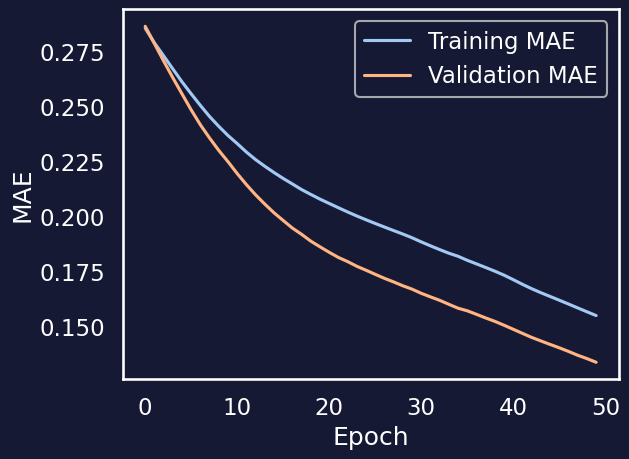

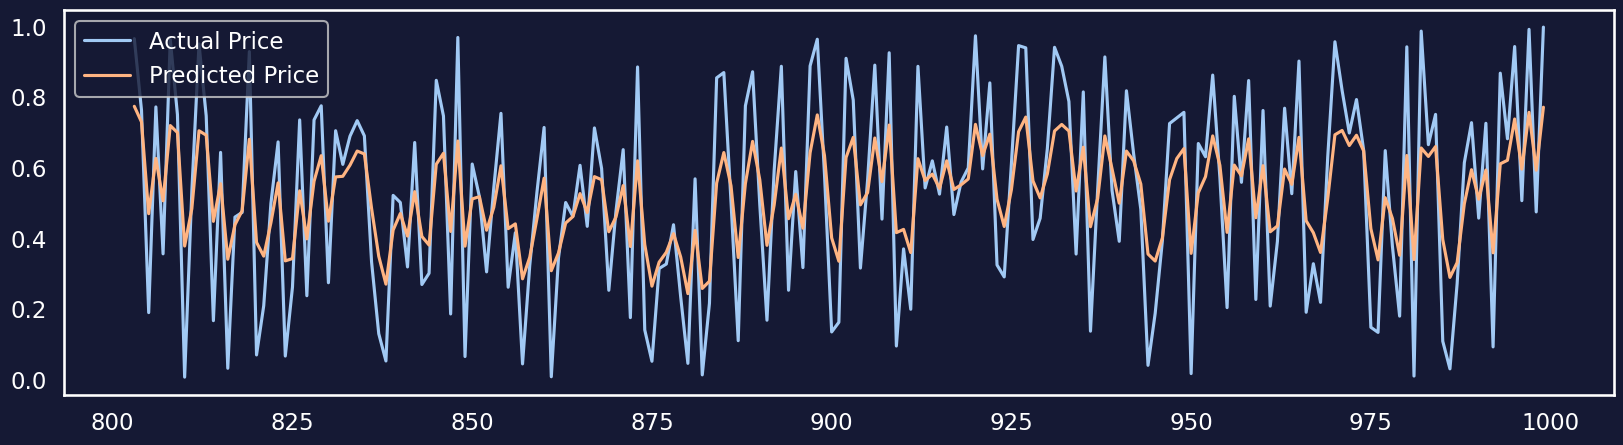

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 0.0295 - mae: 0.1445
Test Mean Absolute Error: 0.14558660984039307


In [244]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Adjust learning rate and add decay schedule for fine-tuning
learning_rate = 0.00001  # Lower learning rate for fine-tuning

# Rebuild the combined model with GPT-2 embeddings and numerical features
combined_model.compile(optimizer=Adam(learning_rate=learning_rate),
                       loss='mean_squared_error',
                       metrics=['mae'])

# Add callbacks for early stopping, model checkpoint, and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

# Fine-tune the model with more epochs and callbacks
history = combined_model.fit([X_train, padded_corpus_train, attention_masks_train],
                             y_train,
                             epochs=50,  # Increase the number of epochs
                             batch_size=32,  # Adjust batch size based on available memory
                             validation_split=0.2,
                             callbacks=[early_stopping, reduce_lr])

# Align the sizes of padded_corpus_test and attention_masks_test with X_test and y_test
padded_corpus_test_aligned = padded_corpus_test[:len(X_test)]
attention_masks_test_aligned = attention_masks_test[:len(X_test)]

# Make predictions on the aligned test set
predictions_gpt2 = combined_model.predict([X_test, padded_corpus_test_aligned, attention_masks_test_aligned])

# Plot training history to visualize improvement
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Flatten y_test for plotting
y_test_flat = y_test

# Plot predictions vs actual values
plt.figure(figsize=(20, 5))
plt.plot(y_test.index, y_test_flat, label="Actual Price", linestyle="-")
plt.plot(y_test.index, predictions_gpt2.flatten(), label="Predicted Price", linestyle="-")
plt.legend()
plt.grid(False)
plt.show()

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([X_test, padded_corpus_test_aligned, attention_masks_test_aligned], y_test)
print(f'Test Mean Absolute Error: {test_mae}')


Results with GPT-2 no embeddings: {'mae': 0.14558661, 'mse': 0.029506845, 'rmse': 0.17177556, 'mape': 150.83974, 'mase': 0.7712323}
                         mae       mse      rmse        mape      mase
CNN_results         0.263702  0.093645  0.306015  643.145874  0.719082
Keras_no_embedding  0.069717  0.006856  0.082804   55.960739  0.944539
GPT_no_embedding    0.145587  0.029507  0.171776  150.839737  0.771232


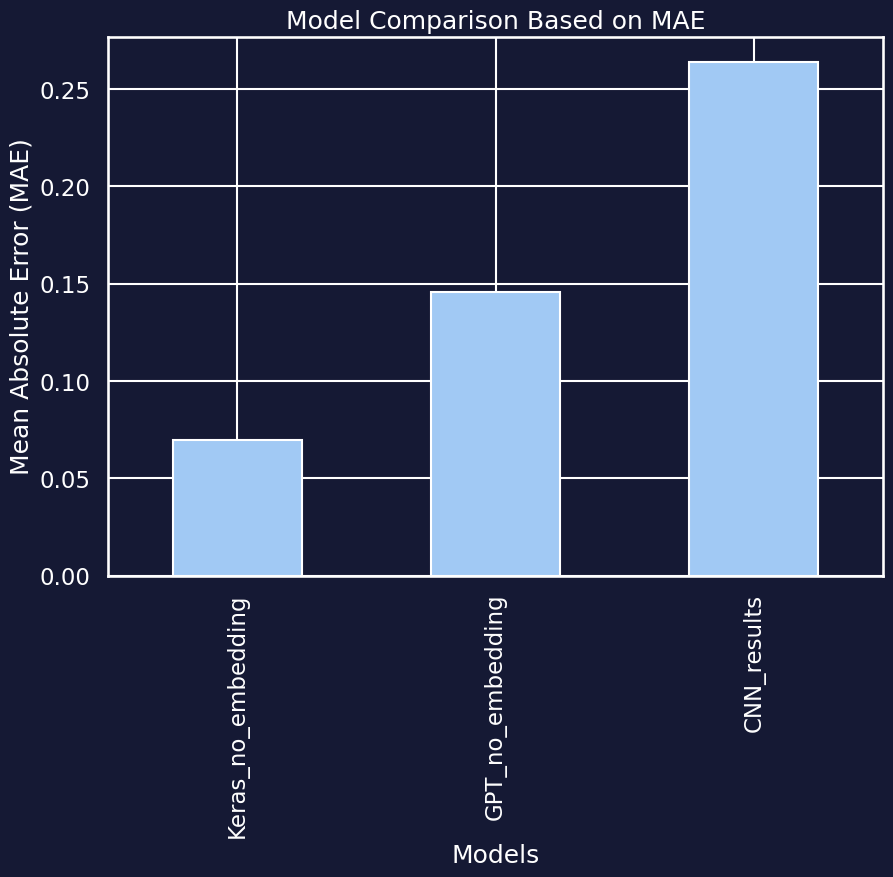

In [246]:
# Evaluate the current model with GPT-2 embeddings
model_results_GPT_no_embedding = evaluate_preds(y_true=y_test, y_pred=predictions_gpt2.flatten())  # Assuming predictions_gpt2 from the previous cell
print("Results with GPT-2 no embeddings:", model_results_GPT_no_embedding)

# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding
}).T  # Transpose the DataFrame for easier plotting

# Print the results for clarity
print(model_results)

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar", legend=False)
plt.title("Model Comparison Based on MAE")
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(True)
plt.show()

In [247]:
model_results

mae       mse      rmse        mape      mase
CNN_results         0.263702  0.093645  0.306015  643.145874  0.719082
Keras_no_embedding  0.069717  0.006856  0.082804   55.960739  0.944539
GPT_no_embedding    0.145587  0.029507  0.171776  150.839737  0.771232

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 341ms/step - loss: 0.0319 - mae: 0.1510 - val_loss: 0.0257 - val_mae: 0.1318 - learning_rate: 1.0000e-05
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0306 - mae: 0.1485 - val_loss: 0.0251 - val_mae: 0.1302 - learning_rate: 1.0000e-05
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0309 - mae: 0.1499 - val_loss: 0.0245 - val_mae: 0.1287 - learning_rate: 1.0000e-05
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0296 - mae: 0.1462 - val_loss: 0.0239 - val_mae: 0.1268 - learning_rate: 1.0000e-05
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0304 - mae: 0.1494 - val_loss: 0.0233 - val_mae: 0.1252 - learning_rate: 1.0000e-05
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 - mae: 0.1448 - val_loss: 0.0228 - val_mae: 0.1238 - learning_rate: 1.0000e-05
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0280 - mae: 0.1429 - val_loss: 0.0222 - val_mae: 0.1220 - learning_rate: 

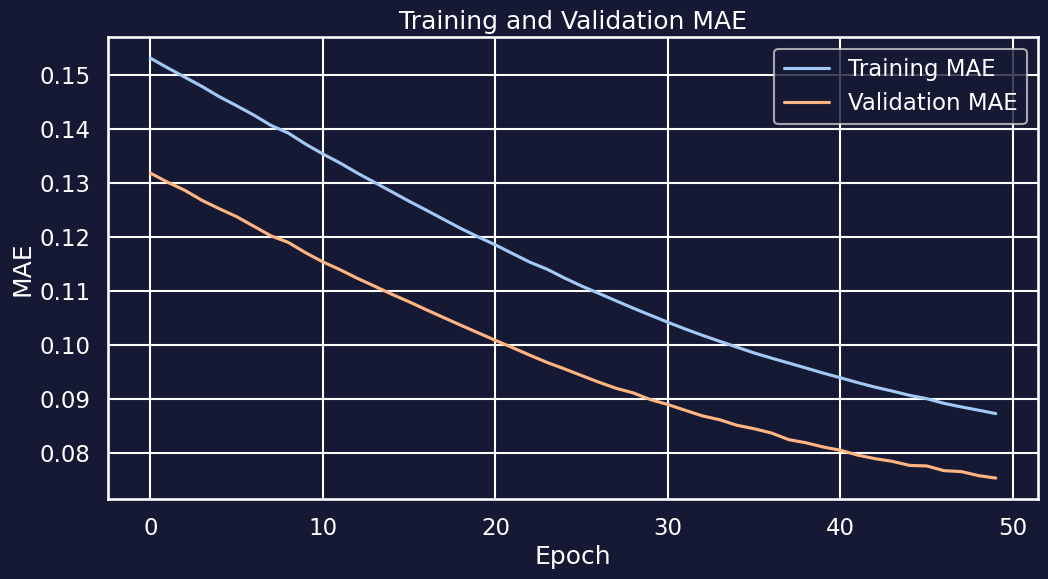

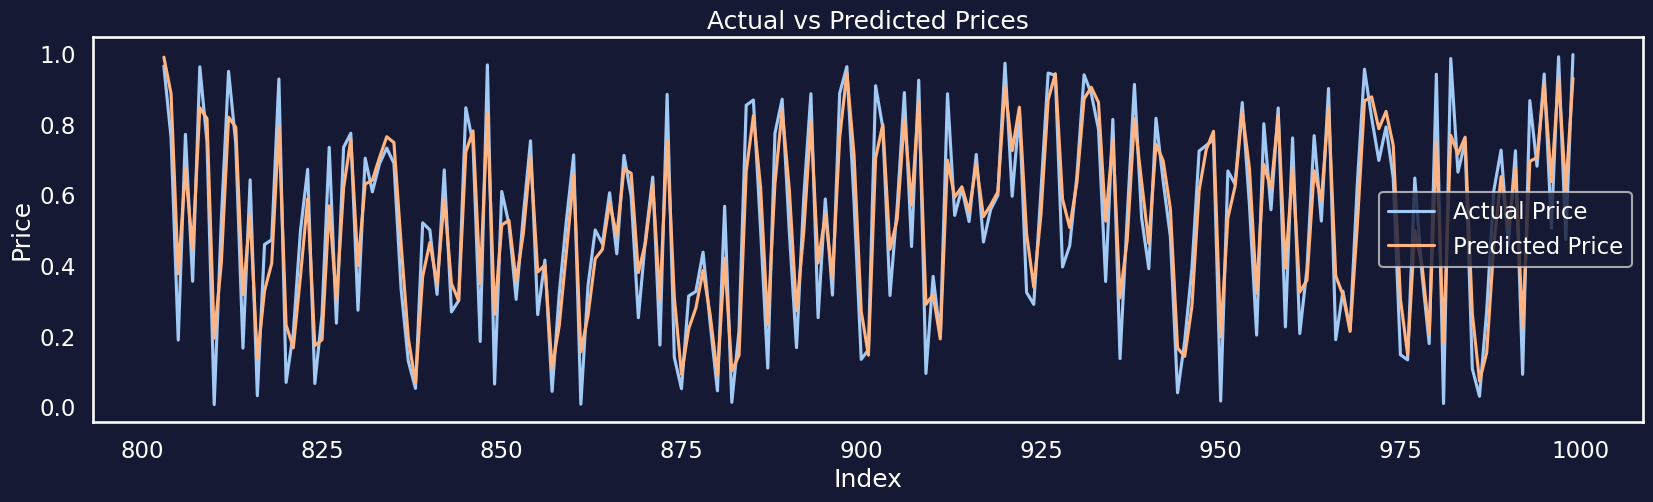

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0101 - mae: 0.0862
Test Mean Absolute Error: 0.0845426544547081
Results with GPT-2 embeddings: {'mae': 0.084542654, 'mse': 0.0100397, 'rmse': 0.100198306, 'mape': 73.04439, 'mase': 0.89084077}
                         mae       mse      rmse        mape      mase
CNN_results         0.263702  0.093645  0.306015  643.145874  0.719082
Keras_no_embedding  0.069717  0.006856  0.082804   55.960739  0.944539
GPT_no_embedding    0.084543  0.010040  0.100198   73.044388  0.890841


<Figure size 1000x700 with 0 Axes>

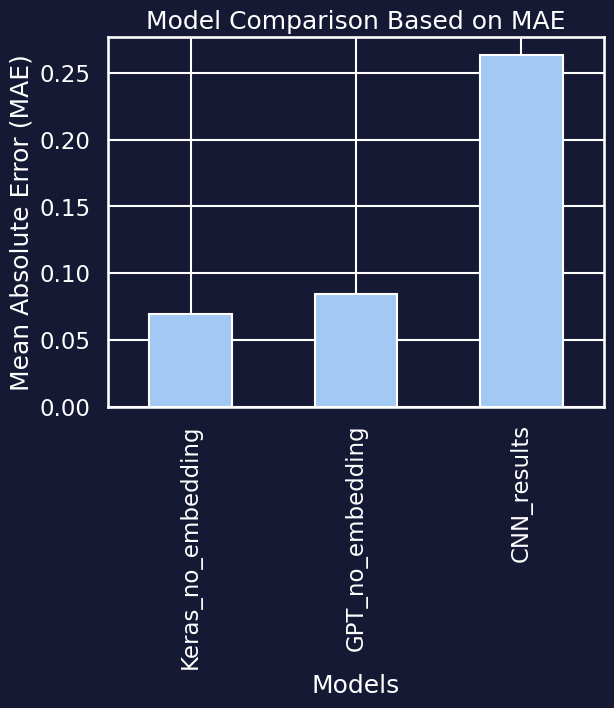

In [248]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

# Define learning rate and other hyperparameters
initial_learning_rate = 0.00001  # Lower learning rate for fine-tuning
batch_size = 32
epochs = 50

# Rebuild the combined model with GPT-2 embeddings and numerical features
combined_model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
                       loss='mean_squared_error',
                       metrics=['mae'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)
# Fine-tune the model
history = combined_model.fit(
    [X_train, padded_corpus_train, attention_masks_train],
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

# Align the sizes of padded_corpus_test and attention_masks_test with X_test
padded_corpus_test_aligned = padded_corpus_test[:len(X_test)]
attention_masks_test_aligned = attention_masks_test[:len(X_test)]

# Make predictions on the aligned test set
predictions_gpt2 = combined_model.predict([X_test, padded_corpus_test_aligned, attention_masks_test_aligned])

# Plot training history to visualize improvement
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.grid(True)
plt.show()

# Flatten y_test for plotting
y_test_flat = y_test

# Plot predictions vs actual values
plt.figure(figsize=(20, 5))
plt.plot(y_test.index, y_test_flat, label="Actual Price", linestyle="-")
plt.plot(y_test.index, predictions_gpt2.flatten(), label="Predicted Price", linestyle="-")
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(False)
plt.show()

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([X_test, padded_corpus_test_aligned, attention_masks_test_aligned], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Evaluate the current model with GPT-2 embeddings
model_results_GPT_no_embedding = evaluate_preds(y_true=y_test_flat, y_pred=predictions_gpt2.flatten())
print("Results with GPT-2 embeddings:", model_results_GPT_no_embedding)

# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding
}).T  # Transpose the DataFrame for easier plotting

# Print the results for clarity
print(model_results)

# Sort model results by MAE and plot them
plt.figure(figsize=(10, 7))
model_results[["mae"]].sort_values(by="mae").plot(kind="bar", legend=False)
plt.title("Model Comparison Based on MAE")
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(True)
plt.show()


In [249]:
model_results

mae       mse      rmse        mape      mase
CNN_results         0.263702  0.093645  0.306015  643.145874  0.719082
Keras_no_embedding  0.069717  0.006856  0.082804   55.960739  0.944539
GPT_no_embedding    0.084543  0.010040  0.100198   73.044388  0.890841

# Keras with embedding

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1129.7026 - mae: 26.6140
Test Mean Absolute Error: 26.419469833374023


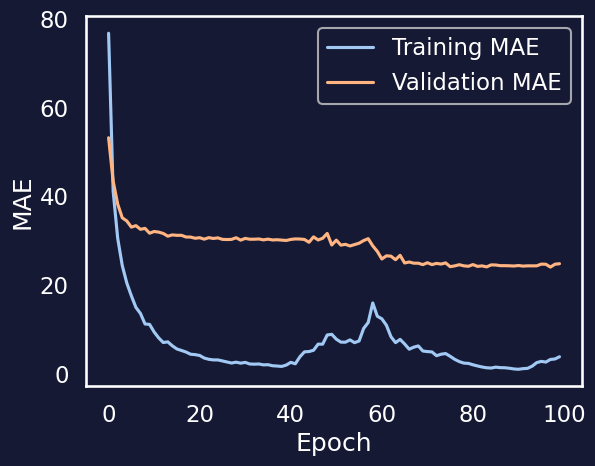

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1129.7026 - mae: 26.6140 
Test Mean Absolute Error: 26.419469833374023


{'mae': 26.41947,
 'mse': 1148.3145,
 'rmse': 33.886787,
 'mape': 14084.57,
 'mase': 78.36143}

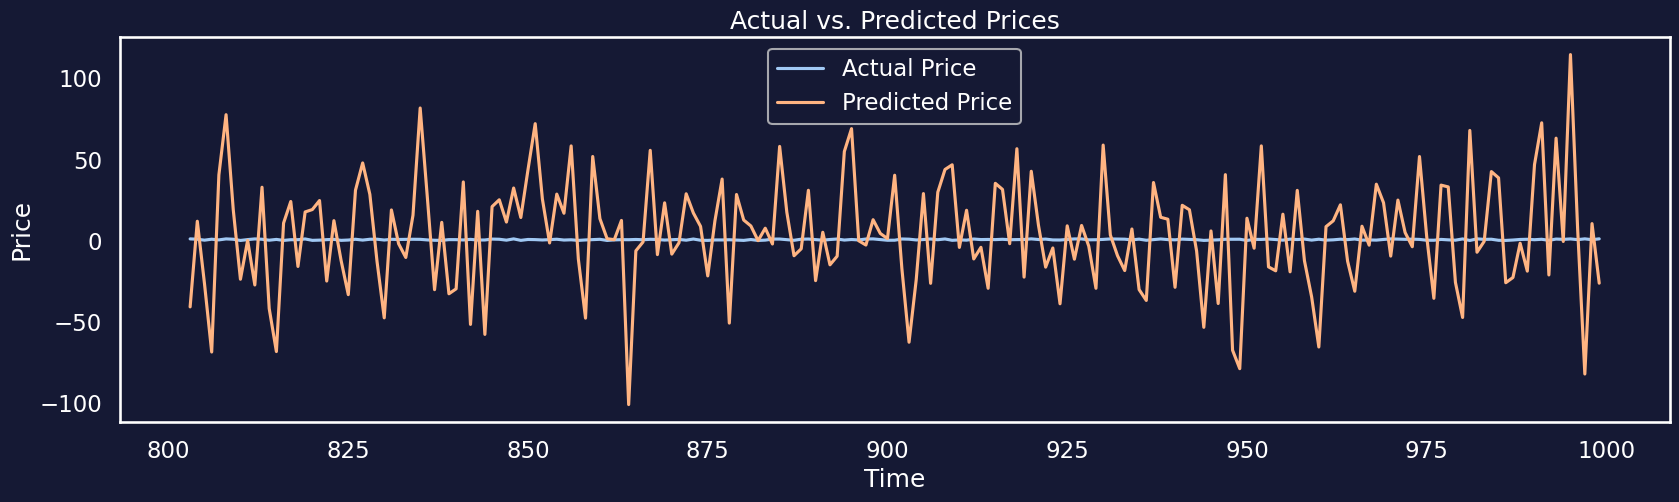

In [250]:
# prompt: build sequential model for with text embedding

# Assuming you have numerical features (x_train_combined, x_test_combined) and labels (y_train, y_test)

# Define the model
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=x_train_combined.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Use linear activation for regression

# Adjusted learning rate
learning_rate = 0.0001

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
history = model.fit(x_train_combined, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test_combined, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(x_test_combined).flatten()

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test_combined, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions, format="-", label="Predicted Price")
plt.grid(False)

# Flatten y_test
y_test_flat = y_test.to_numpy().flatten()

# Evaluate the model's predictions
model_results = evaluate_preds(y_true=y_test_flat, y_pred=predictions)
model_results


{'mae': 26.41947, 'mse': 1148.3145, 'rmse': 33.886787, 'mape': 14084.569, 'mase': 78.305336}


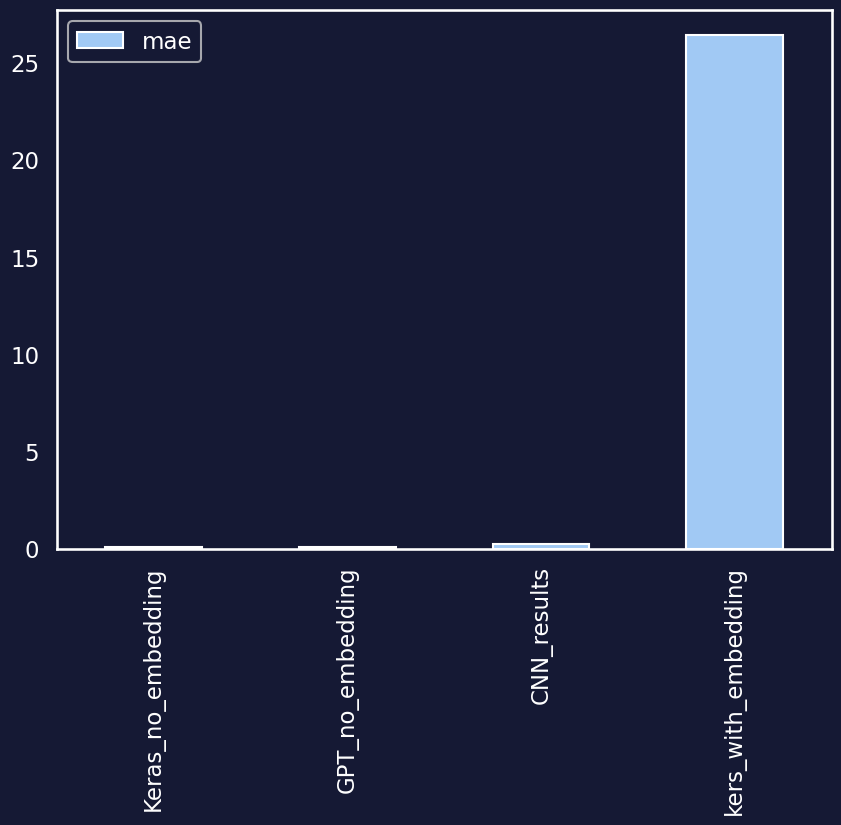

In [251]:
# Assuming evaluate_preds is a predefined function to evaluate predictions
model_results_with_embedding = evaluate_preds(y_true=y_test, y_pred=predictions)
print(model_results_with_embedding)

# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "kers_with_embedding": model_results_with_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding
}).T  # Transpose the DataFrame for easier plotting


# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 115.0805 - mae: 8.1742
Test Mean Absolute Error: 8.531079292297363


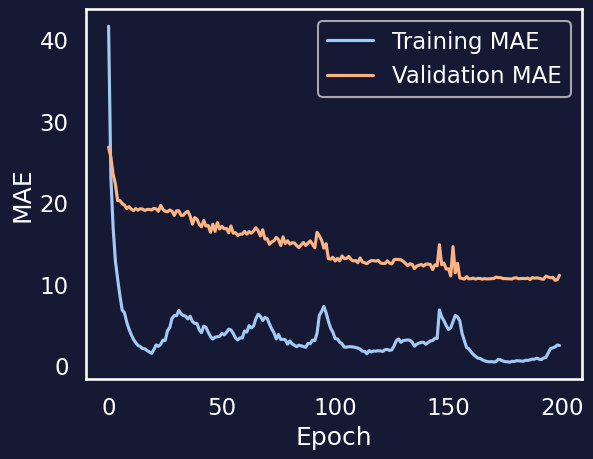

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
{'mae': 8.531079, 'mse': 124.291916, 'rmse': 11.148628, 'mape': 4215.3335, 'mase': 25.471077}


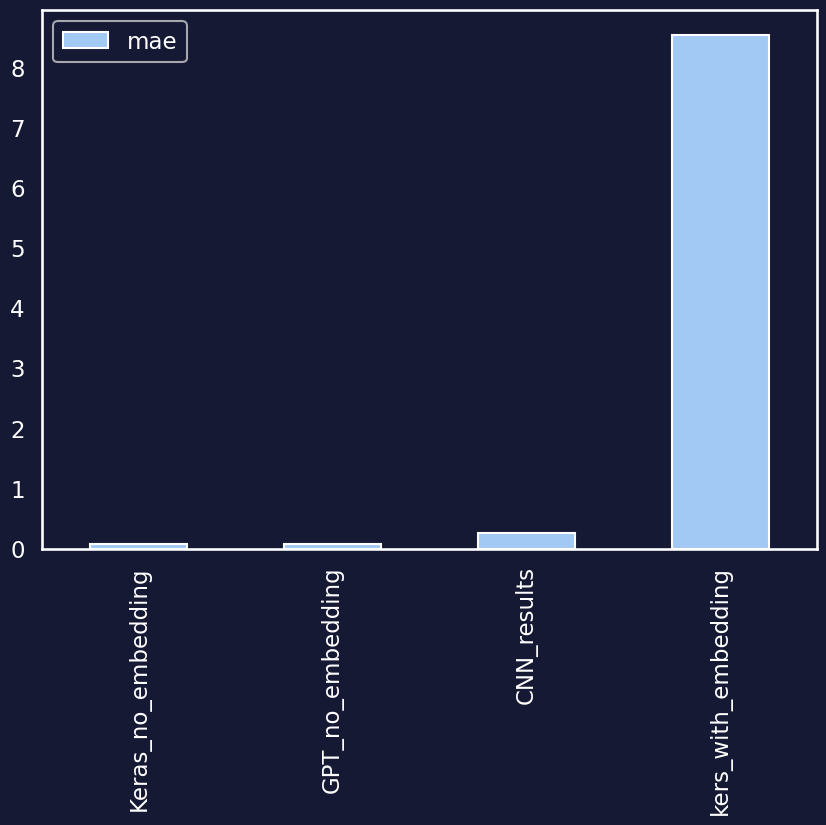

In [252]:
# prompt: i get 619 mae i want below 100 mae

# Increase the number of epochs
epochs = 200  # Try increasing this to 300 or even 500

# Adjust the learning rate
learning_rate = 0.00005  # Try decreasing this to 0.00001 or 0.000005

# Add more layers or neurons
model = Sequential()
model.add(Dense(1024, activation='relu', input_dim=x_train_combined.shape[1]))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model with the adjusted learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model with the increased epochs
history = model.fit(x_train_combined, y_train, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test_combined, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(x_test_combined).flatten()

# Evaluate the model's predictions
model_results_with_embedding = evaluate_preds(y_true=y_test, y_pred=predictions)
print(model_results_with_embedding)

# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "kers_with_embedding": model_results_with_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding
}).T  # Transpose the DataFrame for easier plotting

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1528.3354 - mae: 31.6043
Test Mean Absolute Error: 30.876298904418945


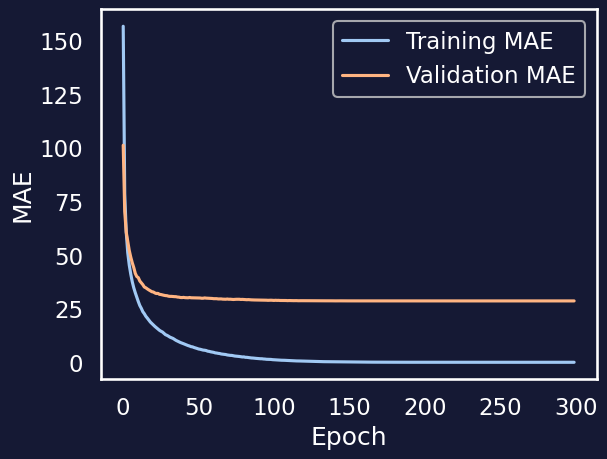

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
{'mae': 30.876299, 'mse': 1540.3527, 'rmse': 39.247326, 'mape': 20107.291, 'mase': 91.62025}


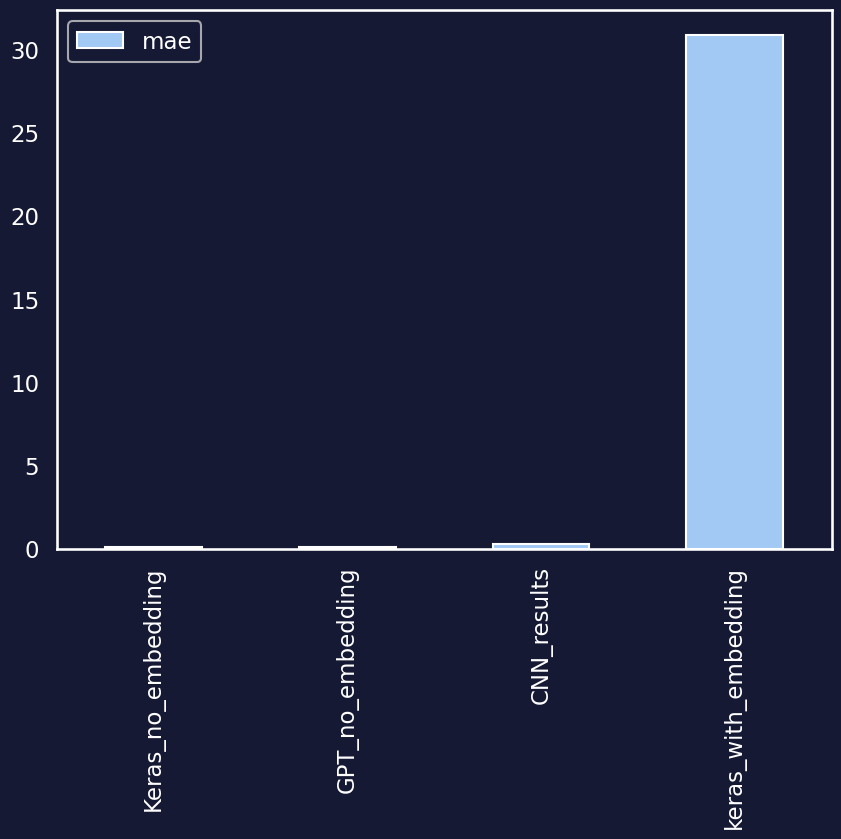

In [253]:
# prompt: still i get high mae

# Increase the number of epochs
epochs = 300  # Try increasing this to 300 or even 500

# Adjust the learning rate
learning_rate = 0.00001  # Try decreasing this to 0.00001 or 0.000005

# Add more layers or neurons
model = Sequential()
model.add(Dense(1024, activation='relu', input_dim=x_train_combined.shape[1]))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model with the adjusted learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model with the increased epochs
history = model.fit(x_train_combined, y_train, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test_combined, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(x_test_combined).flatten()

# Evaluate the model's predictions
model_results_with_embedding = evaluate_preds(y_true=y_test, y_pred=predictions)
print(model_results_with_embedding)

# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "keras_with_embedding": model_results_with_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding
}).T  # Transpose the DataFrame for easier plotting

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()


# GPT with text embedding

In [254]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(784, 784, 197, 197)

In [256]:
# prompt: write code fromhere with text embedding usng GPT model

# Assuming corpus, corpus_test, x_train, x_test, y_train, and y_test are already defined

# Tokenize and encode the text data
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = TFGPT2Model.from_pretrained("gpt2")

def encode_text(corpus):
  encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]
  max_length = 50  # Adjust based on your requirements
  padded_corpus = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')
  return padded_corpus

padded_corpus_train = encode_text(train_news["Text"])
padded_corpus_test = encode_text(test_news["Text"])

# Extract embeddings from GPT-2
def extract_embeddings(padded_corpus):
  embeddings = []
  for sequence in padded_corpus:
    input_ids = tf.constant(sequence)[None, :]  # Batch size 1
    outputs = model(input_ids)
    last_hidden_states = outputs.last_hidden_state
    embedding = tf.reduce_mean(last_hidden_states, axis=1).numpy()  # Average over the sequence length
    embeddings.append(embedding.flatten())
  return np.array(embeddings)

train_embeddings = extract_embeddings(padded_corpus_train)
test_embeddings = extract_embeddings(padded_corpus_test)




All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [257]:
print("x_train shape:", x_train.shape)
print("train_embeddings shape:", train_embeddings.shape)
print("x_test shape:", x_test.shape)
print("test_embeddings shape:", test_embeddings.shape)


x_train shape: (784, 6)
train_embeddings shape: (784, 768)
x_test shape: (197, 6)
test_embeddings shape: (197, 768)


In [258]:
# Determine the minimum number of samples in test data
min_test_length = min(len(x_test), len(test_embeddings))

# Truncate test_embeddings to match x_test
x_test = x_test[:min_test_length]
test_embeddings = test_embeddings[:min_test_length]

# Combine numerical features and text embeddings
x_train_combined = np.concatenate([x_train, train_embeddings], axis=1)
x_test_combined = np.concatenate([x_test, test_embeddings], axis=1)

# Define and train a model (adjust architecture as needed)
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=x_train_combined.shape[1]))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(x_train_combined, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_mae = model.evaluate(x_test_combined, y_test)
print(f'Test Mean Absolute Error: {test_mae}')


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 9.8143 - mae: 2.6603 - val_loss: 2.5058 - val_mae: 1.5564
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0288 - mae: 0.8713 - val_loss: 0.3092 - val_mae: 0.4873
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1730 - mae: 0.3418 - val_loss: 0.0724 - val_mae: 0.2236
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0752 - mae: 0.2342 - val_loss: 0.1073 - val_mae: 0.2584
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0854 - mae: 0.2407 - val_loss: 0.0766 - val_mae: 0.2326
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0695 - mae: 0.2205 - val_loss: 0.0734 - val_mae: 0.2166
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0616 - mae: 0.2068 - val_loss: 0.0636 - val_mae: 0.2040
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0623 - mae: 0.2096 - val_loss: 0.0570 - val_mae: 0.1948
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0603 - mae:

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079 - mae: 0.0723 
Test Mean Absolute Error: 0.07013005018234253


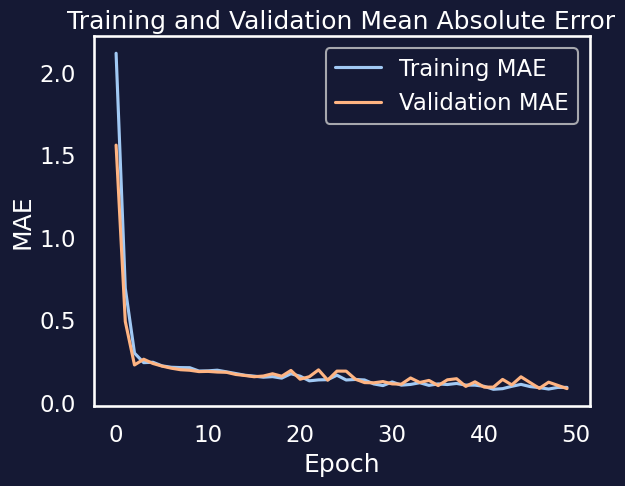

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [259]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set with combined features
test_loss, test_mae = model.evaluate(x_test_combined, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation Mean Absolute Error')
plt.show()

# Make predictions on the test set with combined features
predictions = model.predict(x_test_combined).flatten()


{'mae': 0.07013006, 'mse': 0.0076206746, 'rmse': 0.08729647, 'mape': 56.868393, 'mase': 0.9132774}


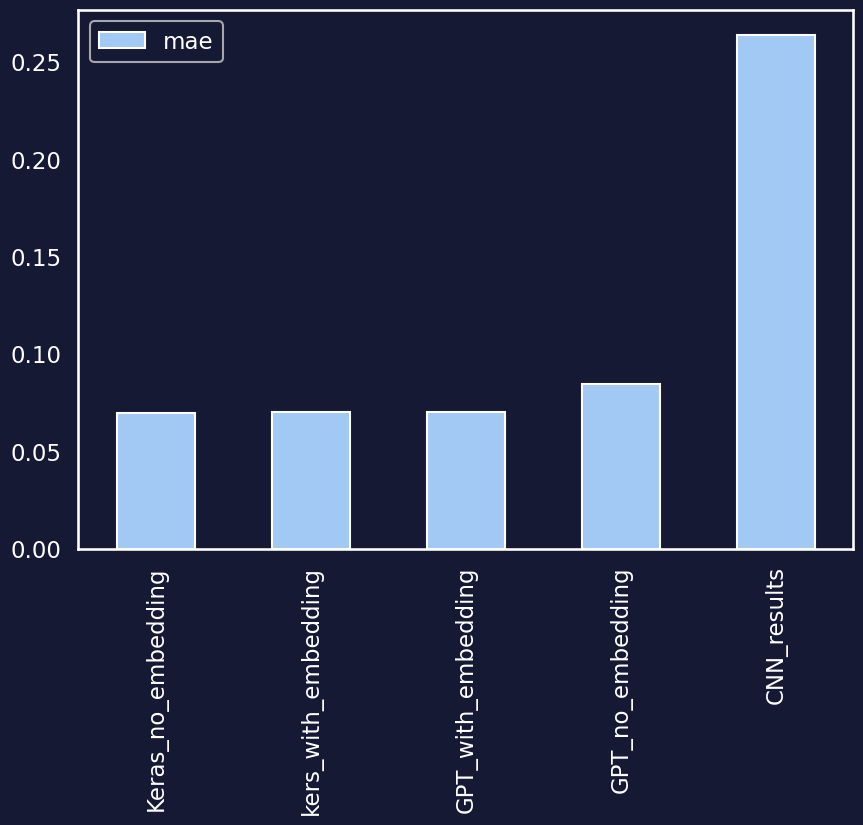

In [260]:
# Assuming evaluate_preds is a predefined function to evaluate predictions
model_results_with_embedding = evaluate_preds(y_true=y_test, y_pred=predictions)
print(model_results_with_embedding)

# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "kers_with_embedding": model_results_with_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding
}).T  # Transpose the DataFrame for easier plotting

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

In [261]:
model_results

mae       mse      rmse        mape      mase
CNN_results          0.263702  0.093645  0.306015  643.145874  0.719082
Keras_no_embedding   0.069717  0.006856  0.082804   55.960739  0.944539
kers_with_embedding  0.070130  0.007621  0.087296   56.868393  0.913277
GPT_no_embedding     0.084543  0.010040  0.100198   73.044388  0.890841
GPT_with_embedding   0.070130  0.007621  0.087296   56.868393  0.913277

# BERT

In [262]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(784, 784, 197, 197)

In [263]:
X

MA7      MA20      20SD  upper_band  lower_band       EMA
19   0.422776  0.529948  0.313771    1.157491   -0.097595  0.649855
20   0.505202  0.531955  0.315643    1.163241   -0.099330  0.769795
21   0.512039  0.557935  0.293276    1.144487   -0.028617  0.627088
22   0.618394  0.550074  0.285130    1.120335   -0.020186  0.715768
23   0.559506  0.526662  0.271878    1.070418   -0.017094  0.541262
..        ...       ...       ...         ...         ...       ...
995  0.641751  0.510262  0.333085    1.176431   -0.155907  0.854387
996  0.610198  0.528910  0.321088    1.171085   -0.113265  0.622232
997  0.686553  0.546076  0.336587    1.219250   -0.127097  0.868215
998  0.650703  0.550956  0.334704    1.220365   -0.118452  0.605611
999  0.780034  0.591865  0.336879    1.265623   -0.081893  0.866841

[981 rows x 6 columns]

In [264]:
y

Value
19   0.768835
20   0.829765
21   0.555734
22   0.760108
23   0.454009
..        ...
995  0.942517
996  0.506154
997  0.991207
998  0.474309
999  0.997456

[981 rows x 1 columns]

In [265]:
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test  = X_test.to_numpy()
y_test  = y_test.to_numpy()

In [266]:
## feature matrix
X_feature_new = [np.asarray(x_train, dtype='int32')]

In [267]:
## feature matrix
X_feature_new_1 = [np.asarray(x_test, dtype='int32')]

In [268]:

## bert tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [269]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode text into token IDs
encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]

# Pad sequences to a specified length
max_length = 50  # Adjust this based on your requirements
padded_corpus_train = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')

# Print the first padded sequence
print("Padded Sequence:", padded_corpus_train[0])

Padded Sequence: [ 101 1996 3643 7457 2011 5717 2391 2048 2698 2048 3157 2176 2416 2274
 2274 2416 2176 5717 2048 2048 2416 2809 2809 2176 1012  102    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [270]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode text into token IDs
encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus_test]

# Pad sequences to a specified length
max_length = 50  # Adjust this based on your requirements
padded_corpus_test = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')

# Print the first padded sequence
print("Padded Sequence:", padded_corpus_test[0])

Padded Sequence: [ 101 2085 2009 2003 3760 2011 5717 2391 5717 2048 2176 2416 2093 2698
 2416 2093 2809 2416 5717 2093 2093 3157 2176 2176 5717 2698 1012  102
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [271]:
# Check the number of samples in each dataset
print("Number of samples in x_test:", x_test.shape[0])
print("Number of samples in padded_corpus_test:", padded_corpus_test.shape[0])

Number of samples in x_test: 197
Number of samples in padded_corpus_test: 197


In [272]:
min_samples = min(x_test.shape[0], padded_corpus_test.shape[0])
# Trim or pad the datasets
x_test = x_test[:min_samples]
padded_corpus_test = padded_corpus_test[:min_samples]
# Now, attempt the concatenation again
x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)
# Check the shape after concatenation
print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_test_combined: (197, 56)


In [273]:

import numpy as np

# Assuming you have numerical features (X_train, X_test) and encoded text sequences (padded_corpus_train, padded_corpus_test)

# Merge numerical features and encoded text sequences for training set
x_train_combined = np.concatenate([x_train, padded_corpus_train], axis=1)

# Merge numerical features and encoded text sequences for testing set
x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)

# Ensure the shapes are correct
print("Shape of x_train_combined:", x_train_combined.shape)
print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_train_combined: (784, 56)
Shape of x_test_combined: (197, 56)


In [274]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(784, 784, 197, 197)

# BERT with no text embedding

In [276]:
import tensorflow as tf
import transformers
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate
from tensorflow.keras.models import Model

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = TFBertModel.from_pretrained(model_name)

# Freeze the pre-trained BERT layers
bert_model.trainable = False

# BERT model input
bert_input = Input(shape=(max_length,), dtype=tf.int32, name="bert_input")

# Define a custom layer to use the BERT model
class BertFeatureExtractor(tf.keras.layers.Layer):
    def __init__(self, bert_model):
        super(BertFeatureExtractor, self).__init__()
        self.bert_model = bert_model

    def call(self, inputs):
        bert_outputs = self.bert_model(inputs)
        return bert_outputs.last_hidden_state

# Use the custom layer
bert_features = BertFeatureExtractor(bert_model)(bert_input)

# Flatten the BERT output
bert_output_flat = Flatten()(bert_features)

# Numerical input layer
your_numerical_feature_dim = 6  # Adjust based on your actual data
numerical_input = Input(shape=(your_numerical_feature_dim,), name="numerical_input")

# Concatenate BERT features with numerical features
combined_input = Concatenate()([bert_output_flat, numerical_input])

# Dense layers
dense_layer1 = Dense(256, activation='relu')(combined_input)
dense_layer2 = Dense(128, activation='relu')(dense_layer1)
dense_layer3 = Dense(64, activation='relu')(dense_layer2)
output_layer = Dense(1, activation='linear')(dense_layer3)

# Define the combined model
combined_model = Model(inputs=[bert_input, numerical_input], outputs=output_layer)

# Compile the model with mean squared error loss for regression
combined_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with combined inputs
combined_model.fit([padded_corpus_train, x_train], y_train, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([padded_corpus_test, x_test], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_BERT = combined_model.predict([padded_corpus_test, x_test])

# Assuming evaluate_preds is a predefined function to evaluate predictions
bert_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
print(bert_model_results)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 44s 559ms/step - loss: 60.4335 - mae: 4.3404 - val_loss: 0.2896 - val_mae: 0.4623
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.2583 - mae: 0.4178 - val_loss: 0.1822 - val_mae: 0.3603
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.1594 - mae: 0.3251 - val_loss: 0.1461 - val_mae: 0.3224
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.3106 - mae: 0.4544 - val_loss: 0.7403 - val_mae: 0.8089
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.3523 - mae: 0.4893 - val_loss: 0.4893 - val_mae: 0.6447
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.2349 - mae: 0.3908 - val_loss: 0.3952 - val_mae: 0.5332
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.3853 - mae: 0.5089 - val_loss: 0.3960 - val_mae: 0.5656
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.2615 - mae: 0.4170 - val_loss: 0.9009 - val_mae: 0.9052
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.

In [277]:
!pip install transformers

import transformers
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate
from tensorflow.keras.models import Model

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = TFBertModel.from_pretrained(model_name)

# Freeze the pre-trained BERT layers
bert_model.trainable = False

# BERT model input
max_length = 50  # Adjust max_length according to your data
bert_input = Input(shape=(max_length,), dtype=tf.int32, name="bert_input")

# Define a custom layer to use the BERT model
class BertFeatureExtractor(tf.keras.layers.Layer):
    def __init__(self, bert_model):
        super(BertFeatureExtractor, self).__init__()
        self.bert_model = bert_model

    def call(self, inputs):
        bert_outputs = self.bert_model(inputs)
        return bert_outputs.last_hidden_state

# Define a custom layer to zero out BERT embeddings
class ZeroOutEmbeddings(tf.keras.layers.Layer):
    def __init__(self):
        super(ZeroOutEmbeddings, self).__init__()

    def call(self, inputs):
        return tf.zeros_like(inputs)

# Use the custom layer for BERT feature extraction and zeroing out embeddings
bert_features = BertFeatureExtractor(bert_model)(bert_input)
zeroed_bert_features = ZeroOutEmbeddings()(bert_features)

# Flatten the zeroed BERT output
bert_output_flat = Flatten()(zeroed_bert_features)

# Numerical input layer
your_numerical_feature_dim = x_train.shape[1]  # Adjust according to your data
numerical_input = Input(shape=(your_numerical_feature_dim,), name="numerical_input")

# Concatenate zeroed BERT features with numerical features
combined_input = Concatenate()([bert_output_flat, numerical_input])

# Dense layers
dense_layer1 = Dense(256, activation='relu')(combined_input)
dense_layer2 = Dense(128, activation='relu')(dense_layer1)
dense_layer3 = Dense(64, activation='relu')(dense_layer2)
output_layer = Dense(1, activation='linear')(dense_layer3)

# Define the combined model
combined_model = Model(inputs=[bert_input, numerical_input], outputs=output_layer)

# Compile the model with mean squared error loss for regression
combined_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with combined inputs
combined_model.fit([padded_corpus_train, x_train], y_train, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([padded_corpus_test, x_test], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_BERT = combined_model.predict([padded_corpus_test, x_test])

# Assuming evaluate_preds is a predefined function to evaluate predictions
bert_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
print(bert_model_results)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 211ms/step - loss: 0.1909 - mae: 0.3552 - val_loss: 0.0519 - val_mae: 0.1877
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0630 - mae: 0.2152 - val_loss: 0.0327 - val_mae: 0.1449
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0291 - mae: 0.1429 - val_loss: 0.0091 - val_mae: 0.0761
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - mae: 0.0898 - val_loss: 0.0078 - val_mae: 0.0738
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mae: 0.0787 - val_loss: 0.0068 - val_mae: 0.0670
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mae: 0.0800 - val_loss: 0.0102 - val_mae: 0.0782
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mae: 0.0777 - val_loss: 0.0068 - val_mae: 0.0689
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mae: 0.0740 - val_loss: 0.0086 - val_mae: 0.0727
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - ma

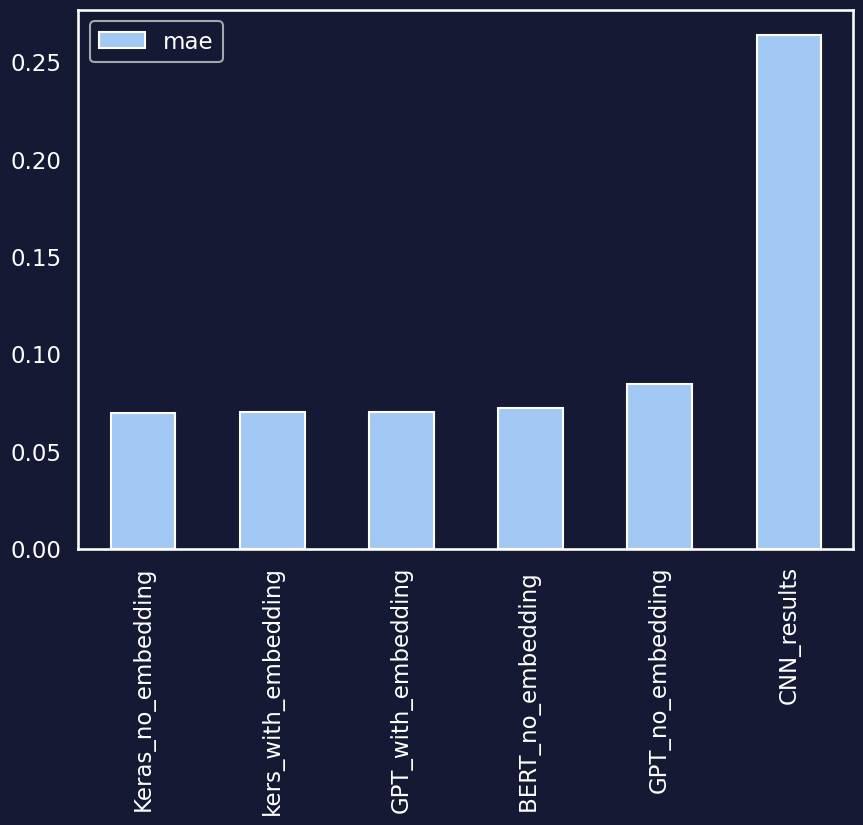

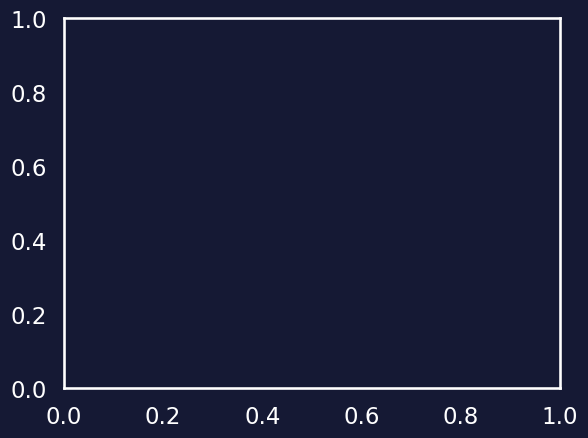

In [278]:
# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "kers_with_embedding": model_results_with_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding,
    "BERT_no_embedding ": bert_model_results
}).T  # Transpose the DataFrame for easier plotting


# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()
plt.grid(False)

# BERT with text embedding

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "functional_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input_ids            │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_attention_masks      │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_feature_extractor_3  │ (None, 50, 768)        │              0 │ text_input_ids[0][0],  │
│ (BERTFeatureExtractor)    │                        │                │ text_attention_masks[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ numerical_input           │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 38400)          │              0 │ bert_feature_extracto… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 38406)          │              0 │ numerical_input[0][0], │
│ (Concatenate)             │                        │                │ flatten_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_50 (Dense)          │ (None, 256)            │      9,832,192 │ concatenate_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_51 (Dense)          │ (None, 128)            │         32,896 │ dense_50[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_52 (Dense)          │ (None, 64)             │          8,256 │ dense_51[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_53 (Dense)          │ (None, 1)              │             65 │ dense_52[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,873,409 (37.66 MB)

 Trainable params: 9,873,409 (37.66 MB)

 Non-trainable params: 0 (0.00 B)

x_test_np shape: (197, 6)
padded_corpus_test_np shape: (197, 50)
attention_masks_test_np shape: (197, 50)
y_test shape: (197, 1)
Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - loss: 34.0394 - mae: 3.0024 - val_loss: 0.7164 - val_mae: 0.7739
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - loss: 0.4968 - mae: 0.6071 - val_loss: 0.0995 - val_mae: 0.2554
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.1756 - mae: 0.3442 - val_loss: 0.0700 - val_mae: 0.2123
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.2955 - mae: 0.4403 - val_loss: 0.5371 - val_mae: 0.6605
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.6241 - mae: 0.6876 - val_loss: 0.1163 - val_mae: 0.2837
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 909ms/step - loss: 0.1110 - mae: 0.2698
Test Mean Absolute Error: 0.25877097249031067


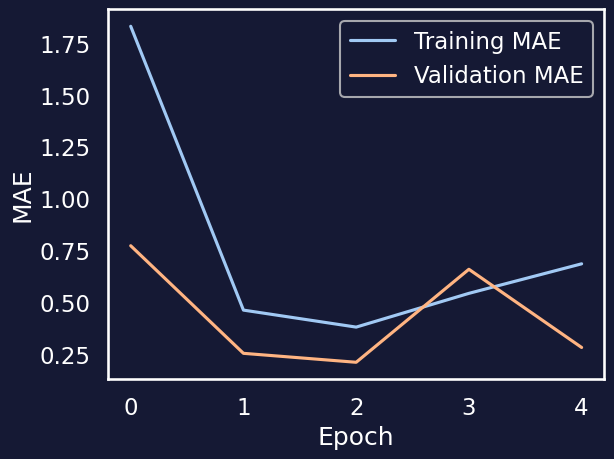

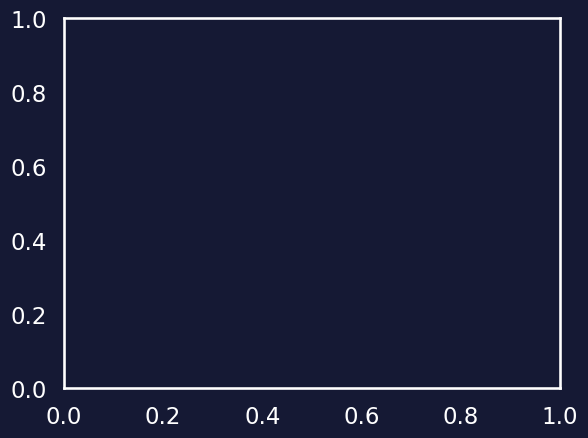

In [279]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Concatenate, Input
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Assuming your data is already in numpy format
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=True)
bert_model = TFBertModel.from_pretrained(model_name)

# Tokenize and pad the training and testing text data
encoded_corpus_train = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]
encoded_corpus_test = [tokenizer.encode(text, add_special_tokens=True) for text in corpus_test]

max_length = 50  # Maximum length for padding/truncating sequences
padded_corpus_train = pad_sequences(encoded_corpus_train, maxlen=max_length, padding='post', truncating='post')
padded_corpus_test = pad_sequences(encoded_corpus_test, maxlen=max_length, padding='post', truncating='post')

# Create attention masks for the text data
attention_masks_train = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_train])
attention_masks_test = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_test])

# Define input shapes
numerical_input_shape = x_train.shape[1]
text_input_shape = max_length

# Define the custom layer for BERT
class BERTFeatureExtractor(tf.keras.layers.Layer):
    def __init__(self, bert_model):
        super(BERTFeatureExtractor, self).__init__()
        self.bert_model = bert_model

    def call(self, inputs):
        input_ids, attention_masks = inputs
        outputs = self.bert_model(input_ids, attention_mask=attention_masks)
        return outputs.last_hidden_state

# Define the numerical input layer
numerical_input = Input(shape=(numerical_input_shape,), name="numerical_input")

# Define the text input layers
text_input_ids = Input(shape=(text_input_shape,), dtype=tf.int32, name="text_input_ids")
text_attention_masks = Input(shape=(text_input_shape,), dtype=tf.float32, name="text_attention_masks")

# Use the custom layer to get BERT features
bert_features = BERTFeatureExtractor(bert_model)([text_input_ids, text_attention_masks])

# Flatten the BERT output
text_embedding_flat = Flatten()(bert_features)

# Concatenate numerical and text features
combined_input = Concatenate()([numerical_input, text_embedding_flat])

# Dense layers for regression
dense_layer1 = Dense(256, activation='relu')(combined_input)
dense_layer2 = Dense(128, activation='relu')(dense_layer1)
dense_layer3 = Dense(64, activation='relu')(dense_layer2)
output_layer = Dense(1, activation='linear')(dense_layer3)

# Create the combined model
combined_model = Model(inputs=[numerical_input, text_input_ids, text_attention_masks], outputs=output_layer)

# Compile the model
combined_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
combined_model.summary()

# Convert inputs to NumPy arrays
x_train_np = np.array(x_train)
x_test_np = np.array(x_test)
padded_corpus_train_np = np.array(padded_corpus_train)
padded_corpus_test_np = np.array(padded_corpus_test)
attention_masks_train_np = np.array(attention_masks_train)
attention_masks_test_np = np.array(attention_masks_test)

# Print shapes to debug the issue
print(f'x_test_np shape: {x_test_np.shape}')
print(f'padded_corpus_test_np shape: {padded_corpus_test_np.shape}')
print(f'attention_masks_test_np shape: {attention_masks_test_np.shape}')
print(f'y_test shape: {y_test.shape}')

# Trimming padded_corpus_test_np and attention_masks_test_np to match x_test_np and y_test
padded_corpus_test_np = padded_corpus_test_np[:x_test_np.shape[0]]
attention_masks_test_np = attention_masks_test_np[:x_test_np.shape[0]]

# Ensure the number of samples matches across all inputs
assert x_train_np.shape[0] == padded_corpus_train_np.shape[0] == attention_masks_train_np.shape[0] == y_train.shape[0], "Train input shapes do not match"
assert x_test_np.shape[0] == padded_corpus_test_np.shape[0] == attention_masks_test_np.shape[0] == y_test.shape[0], "Test input shapes do not match"

# Train the model
history = combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([x_test_np, padded_corpus_test_np, attention_masks_test_np], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()
plt.grid(False)


7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step
{'mae': 0.258771, 'mse': 0.103191145, 'rmse': 0.32123378, 'mape': 212.75894, 'mase': 0.76752734}


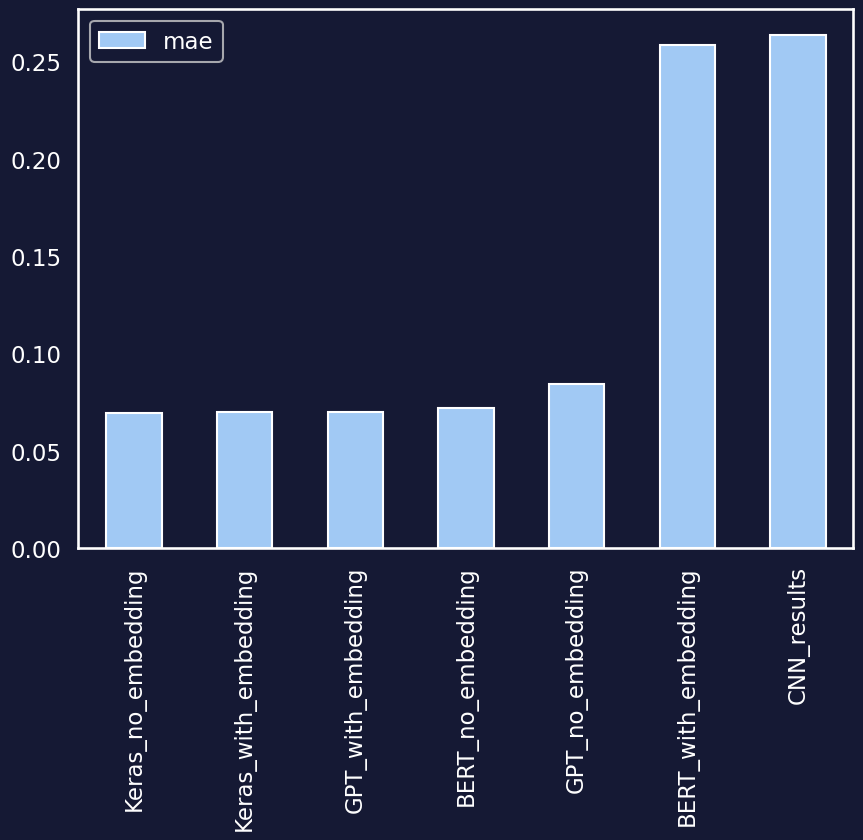

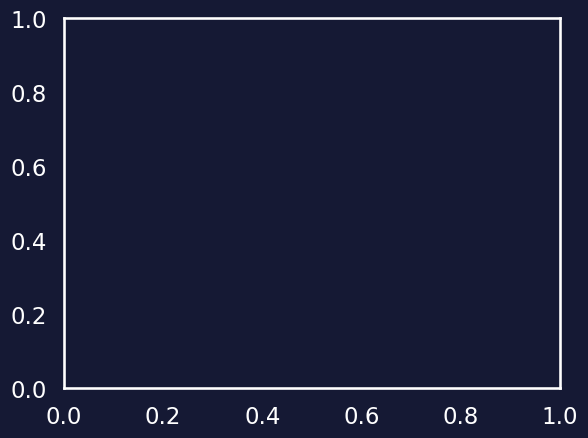

In [280]:
# Predict on the test set
predictions_BERT = combined_model.predict([np.array(x_test_np), np.array(padded_corpus_test_np), np.array(attention_masks_test_np)])

# Evaluate predictions
BERT_dense_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
print(BERT_dense_model_results)

# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "Keras_with_embedding": model_results_with_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding,
    "BERT_no_embedding": bert_model_results,
    "BERT_with_embedding": BERT_dense_model_results
}).T  # Transpose the DataFrame for easier plotting




# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()
plt.grid(False)

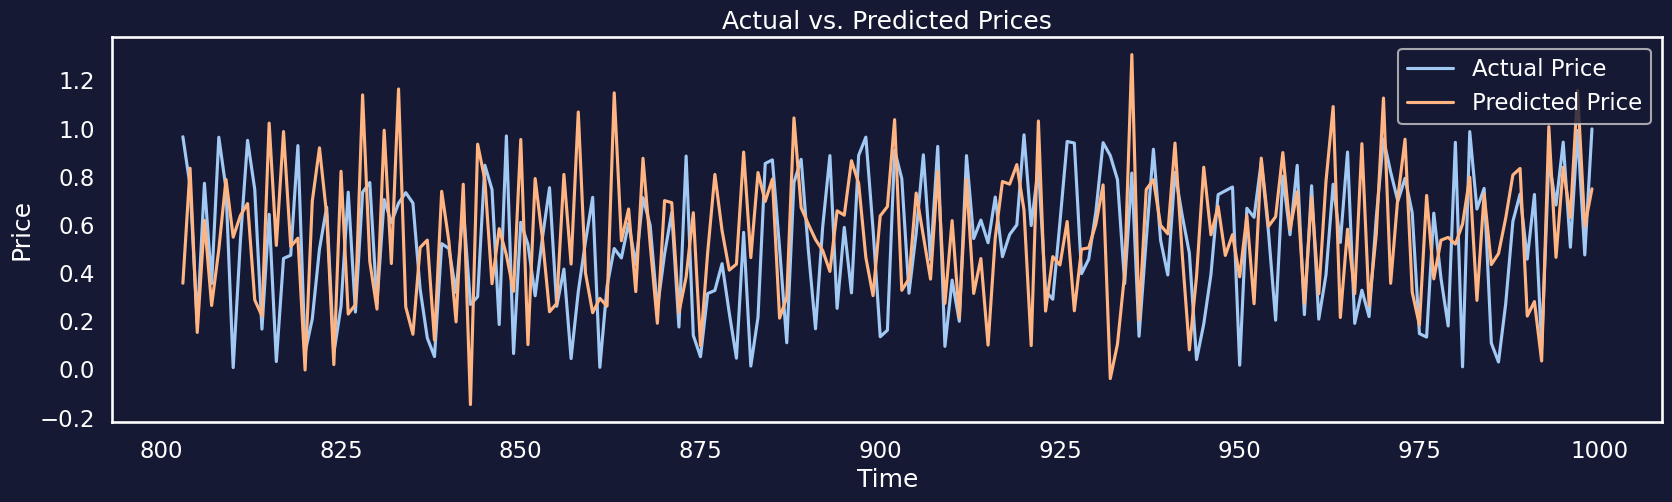

mae       mse      rmse        mape      mase
CNN_results           0.263702  0.093645  0.306015  643.145874  0.719082
Keras_no_embedding    0.069717  0.006856  0.082804   55.960739  0.944539
Keras_with_embedding  0.070130  0.007621  0.087296   56.868393  0.913277
GPT_no_embedding      0.084543  0.010040  0.100198   73.044388  0.890841
GPT_with_embedding    0.070130  0.007621  0.087296   56.868393  0.913277
BERT_no_embedding     0.072155  0.007610  0.087238   47.561371  0.214017
BERT_with_embedding   0.258771  0.103191  0.321234  212.758942  0.767527

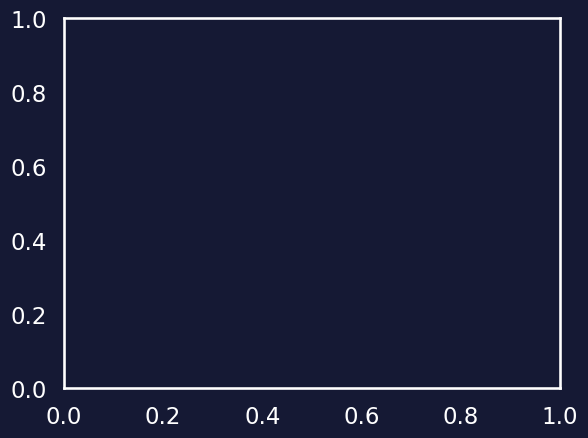

In [281]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_BERT, format="-", label="Predicted Price")
plt.show()
plt.grid(False)


# Compare model results
model_results


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                     │ (None, 512)                 │      19,664,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,836,929 (75.67 MB)

 Trainable params: 19,836,929 (75.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - loss: 68.1288 - mae: 3.9221 - val_loss: 0.3222 - val_mae: 0.4891
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6438 - mae: 0.6672 - val_loss: 0.8099 - val_mae: 0.7831
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1336 - mae: 0.9296 - val_loss: 0.1008 - val_mae: 0.2559
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3217 - mae: 0.4693 - val_loss: 0.6924 - val_mae: 0.7920
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2954 - mae: 0.4549 - val_loss: 0.1220 - val_mae: 0.2816
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1306 - mae: 0.2986
Test Mean Absolute Error: 0.2849748730659485


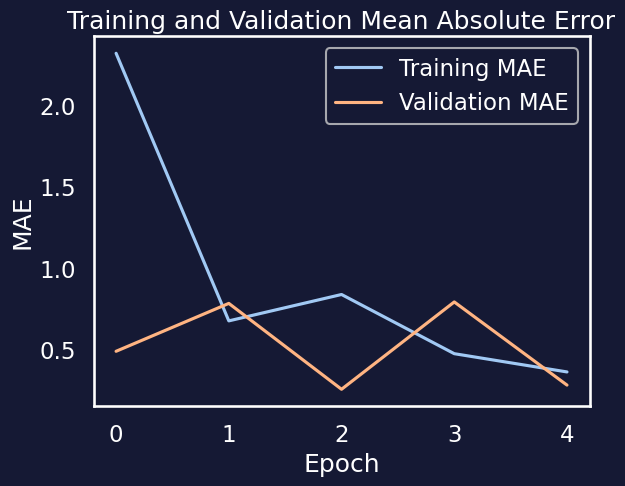

In [282]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming your data is already in numpy format
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=True)
bert_model = TFBertModel.from_pretrained(model_name)

# Tokenize and pad the training and testing text data
encoded_corpus_train = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]
encoded_corpus_test = [tokenizer.encode(text, add_special_tokens=True) for text in corpus_test]

max_length = 50  # Maximum length for padding/truncating sequences
padded_corpus_train = pad_sequences(encoded_corpus_train, maxlen=max_length, padding='post', truncating='post')
padded_corpus_test = pad_sequences(encoded_corpus_test, maxlen=max_length, padding='post', truncating='post')

# Create attention masks for the text data
attention_masks_train = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_train])
attention_masks_test = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_test])

# Adjust the number of samples to match between x_test and test BERT embeddings if needed
if x_test.shape[0] != padded_corpus_test.shape[0]:
    print("Adjusting the number of samples to match between x_test and test BERT embeddings.")
    min_samples = min(x_test.shape[0], padded_corpus_test.shape[0])
    x_test = x_test[:min_samples]
    padded_corpus_test = padded_corpus_test[:min_samples]
    attention_masks_test = attention_masks_test[:min_samples]
    y_test = y_test[:min_samples]

# Define the custom layer for BERT feature extraction
class BERTFeatureExtractor(tf.keras.layers.Layer):
    def __init__(self, bert_model):
        super(BERTFeatureExtractor, self).__init__()
        self.bert_model = bert_model

    def call(self, inputs):
        input_ids, attention_masks = inputs
        outputs = self.bert_model(input_ids, attention_mask=attention_masks)
        return outputs.last_hidden_state

# Extract BERT features for training and testing datasets
bert_feature_extractor = BERTFeatureExtractor(bert_model)

# Compute BERT embeddings for train and test sets
train_bert_embeddings = bert_feature_extractor([padded_corpus_train, attention_masks_train])
test_bert_embeddings = bert_feature_extractor([padded_corpus_test, attention_masks_test])

# Convert TensorFlow tensors to numpy arrays
train_bert_embeddings_np = train_bert_embeddings.numpy()
test_bert_embeddings_np = test_bert_embeddings.numpy()

# Flatten BERT embeddings to combine with numerical inputs
train_bert_embeddings_flat = train_bert_embeddings_np.reshape(train_bert_embeddings_np.shape[0], -1)
test_bert_embeddings_flat = test_bert_embeddings_np.reshape(test_bert_embeddings_np.shape[0], -1)

# Combine numerical features with BERT embeddings
x_train_combined = np.concatenate([x_train, train_bert_embeddings_flat], axis=1)
x_test_combined = np.concatenate([x_test, test_bert_embeddings_flat], axis=1)

# Define a Sequential model
model = Sequential([
    Dense(512, activation='relu', input_dim=x_train_combined.shape[1]),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(x_train_combined, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test_combined, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation Mean Absolute Error')
plt.show()


In [283]:
# Step 1: Recalculate BERT embeddings for the test data (if not already done)
test_bert_embeddings = bert_feature_extractor([padded_corpus_test, attention_masks_test])

# Convert TensorFlow tensors to numpy arrays
test_bert_embeddings_np = test_bert_embeddings.numpy()

# Flatten BERT embeddings to combine with numerical inputs
test_bert_embeddings_flat = test_bert_embeddings_np.reshape(test_bert_embeddings_np.shape[0], -1)

# Step 2: Combine numerical features with BERT embeddings (same as during training)
x_test_combined = np.concatenate([x_test, test_bert_embeddings_flat], axis=1)

# Step 3: Make predictions using the combined test set
predictions_BERT = model.predict(x_test_combined)

# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT.flatten())
print(f'BERT + Dense Model Results: {BERT_dense_model_results}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
BERT + Dense Model Results: {'mae': 0.2849749, 'mse': 0.12350264, 'rmse': 0.35142943, 'mape': 279.40103, 'mase': 1.016895}


Model Comparison Results:
                           mae       mse      rmse        mape      mase
CNN_results           0.263702  0.093645  0.306015  643.145874  0.719082
Keras_no_embedding    0.069717  0.006856  0.082804   55.960739  0.944539
Keras_with_embedding  0.070130  0.007621  0.087296   56.868393  0.913277
GPT_no_embedding      0.084543  0.010040  0.100198   73.044388  0.890841
GPT_with_embedding    0.070130  0.007621  0.087296   56.868393  0.913277
BERT_no_embedding     0.072155  0.007610  0.087238   47.561371  0.214017
BERT_with_embedding   0.284975  0.123503  0.351429  279.401031  1.016895


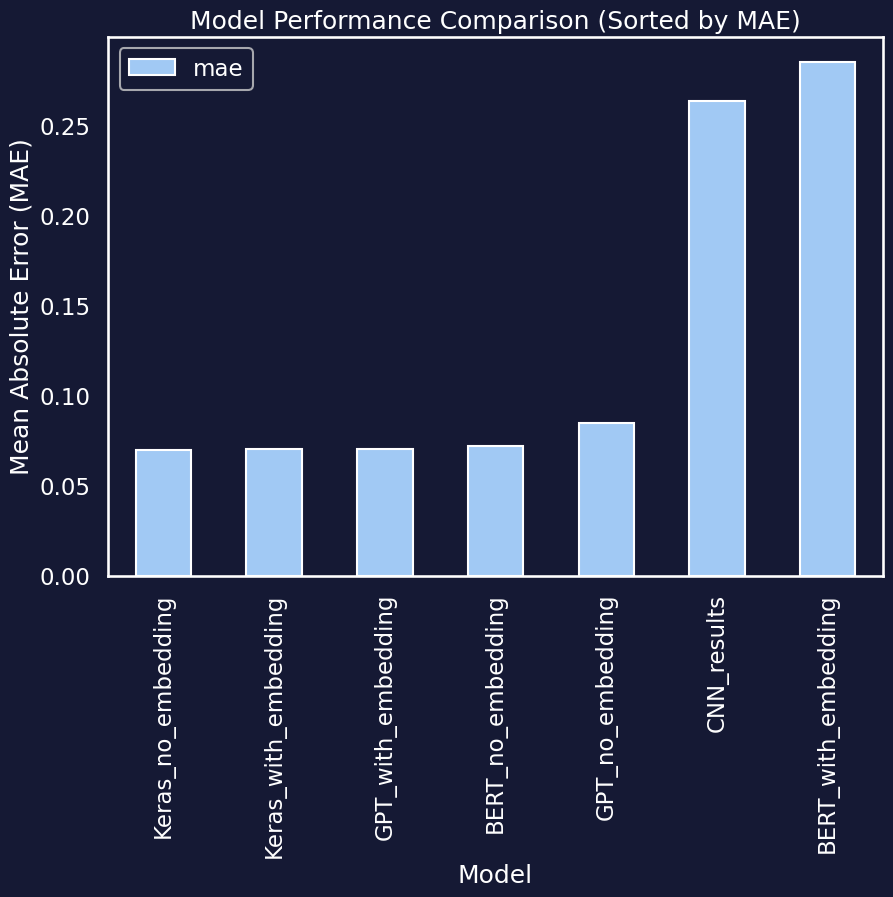

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "Keras_with_embedding": model_results_with_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding,
    "BERT_no_embedding": bert_model_results,
    "BERT_with_embedding": BERT_dense_model_results
}).T  # Transpose the DataFrame for easier plotting


# Print out all model results for comparison
print("Model Comparison Results:")
print(model_results)

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.title("Model Performance Comparison (Sorted by MAE)")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(False)
plt.show()


In [285]:
print(f"x_test shape: {x_test.shape}")
print(f"padded_corpus_test shape: {padded_corpus_test.shape}")
print(f"attention_masks_test shape: {attention_masks_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_test shape: (197, 6)
padded_corpus_test shape: (197, 50)
attention_masks_test shape: (197, 50)
y_test shape: (197, 1)


In [286]:
min_samples = len(x_test)  # or len(y_test), since they are equal in this case


In [287]:
# Adjust the arrays to match the minimum number of samples
padded_corpus_test = padded_corpus_test[:min_samples]
attention_masks_test = attention_masks_test[:min_samples]
y_test = y_test[:min_samples]


In [288]:
print(f"x_test shape after adjustment: {x_test.shape}")
print(f"padded_corpus_test shape after adjustment: {padded_corpus_test.shape}")
print(f"attention_masks_test shape after adjustment: {attention_masks_test.shape}")
print(f"y_test shape after adjustment: {y_test.shape}")


x_test shape after adjustment: (197, 6)
padded_corpus_test shape after adjustment: (197, 50)
attention_masks_test shape after adjustment: (197, 50)
y_test shape after adjustment: (197, 1)


Model: "functional_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input_ids            │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_attention_masks      │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ numerical_input           │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_layer (BertLayer)    │ (None, 768)            │              0 │ text_input_ids[0][0],  │
│                           │                        │                │ text_attention_masks[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 774)            │              0 │ numerical_input[0][0], │
│ (Concatenate)             │                        │                │ bert_layer[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_59 (Dense)          │ (None, 256)            │        198,400 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_60 (Dense)          │ (None, 128)            │         32,896 │ dense_59[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_61 (Dense)          │ (None, 64)             │          8,256 │ dense_60[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_62 (Dense)          │ (None, 1)              │             65 │ dense_61[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 239,617 (936.00 KB)

 Trainable params: 239,617 (936.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - loss: 0.4607 - mae: 0.4662 - val_loss: 0.0635 - val_mae: 0.2073
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0807 - mae: 0.2413 - val_loss: 0.0494 - val_mae: 0.1837
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0587 - mae: 0.2036 - val_loss: 0.0459 - val_mae: 0.1775
Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 0.0527 - mae: 0.1942 - val_loss: 0.0457 - val_mae: 0.1774
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - loss: 0.0520 - mae: 0.1948 - val_loss: 0.0452 - val_mae: 0.1757
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0536 - mae: 0.1966 - val_loss: 0.0459 - val_mae: 0.1782
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0481 - mae: 0.1860 - val_loss: 0.0452 - val_mae: 0.1762
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0494 - mae: 0.1906 - val_loss: 0.0454 - val_mae: 0.1772
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 980ms/step - loss: 0.0504 - mae: 0.1900
Test

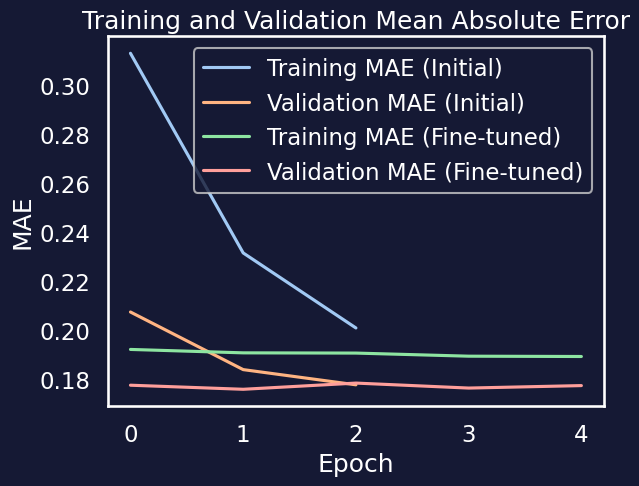

7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
{'mae': 0.18608552, 'mse': 0.048007138, 'rmse': 0.2191053, 'mape': 165.77985, 'mase': 0.55193865}


In [289]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Layer
from tensorflow.keras.models import Model

# Create a custom Keras Layer to handle the BERT model
class BertLayer(Layer):
    def __init__(self, bert_model, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert_model = bert_model

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.bert_model(input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state[:, 0, :]  # Extract the [CLS] token embedding

# Define input shapes
numerical_input_shape = x_train.shape[1]
text_input_shape = max_length

# Define the numerical input layer
numerical_input = Input(shape=(numerical_input_shape,), name="numerical_input")

# Define the text input layers
text_input_ids = Input(shape=(text_input_shape,), dtype=tf.int32, name="text_input_ids")
text_attention_masks = Input(shape=(text_input_shape,), dtype=tf.float32, name="text_attention_masks")

# Apply the custom BERT layer to get the embeddings
bert_embeddings = BertLayer(bert_model)([text_input_ids, text_attention_masks])

# Concatenate numerical and text features
combined_input = Concatenate()([numerical_input, bert_embeddings])

# Dense layers for regression
dense_layer1 = Dense(256, activation='relu')(combined_input)
dense_layer2 = Dense(128, activation='relu')(dense_layer1)
dense_layer3 = Dense(64, activation='relu')(dense_layer2)
output_layer = Dense(1, activation='linear')(dense_layer3)

# Create the combined model
combined_model = Model(inputs=[numerical_input, text_input_ids, text_attention_masks], outputs=output_layer)

# Freeze BERT layers initially
for layer in bert_model.layers:
    layer.trainable = False

# Compile the model
combined_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
combined_model.summary()

# Train the model with frozen BERT layers
history = combined_model.fit(
    [x_train, padded_corpus_train, attention_masks_train],
    y_train,
    epochs=3,
    batch_size=32,
    validation_split=0.2
)

# Unfreeze BERT layers for fine-tuning
for layer in bert_model.layers:
    layer.trainable = True

# Recompile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)  # Adjust learning rate as needed
combined_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fine-tune the model
history_fine_tune = combined_model.fit(
    [x_train, padded_corpus_train, attention_masks_train],
    y_train,
    epochs=5,  # Adjust epochs for fine-tuning
    batch_size=32,
    validation_split=0.2
)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([x_test, padded_corpus_test, attention_masks_test], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE (Initial)')
plt.plot(history.history['val_mae'], label='Validation MAE (Initial)')
plt.plot(history_fine_tune.history['mae'], label='Training MAE (Fine-tuned)')
plt.plot(history_fine_tune.history['val_mae'], label='Validation MAE (Fine-tuned)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation Mean Absolute Error')
plt.show()

# Predict on the test set
predictions_BERT = combined_model.predict([x_test, padded_corpus_test, attention_masks_test])

# Evaluate predictions
BERT_dense_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
print(BERT_dense_model_results)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - loss: 0.0495 - mae: 0.1894 - val_loss: 0.0451 - val_mae: 0.1761
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0470 - mae: 0.1823 - val_loss: 0.0451 - val_mae: 0.1761
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0495 - mae: 0.1884 - val_loss: 0.0451 - val_mae: 0.1764
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0487 - mae: 0.1836 - val_loss: 0.0449 - val_mae: 0.1758
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0506 - mae: 0.1875 - val_loss: 0.0450 - val_mae: 0.1759
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.0504 - mae: 0.1897 - val_loss: 0.0450 - val_mae: 0.1763
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.0464 - mae: 0.1812 - val_loss: 0.0449 - val_mae: 0.1758
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0518 - mae: 0.1918 - val_loss: 0.0446 - val_mae: 0.1750
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.05

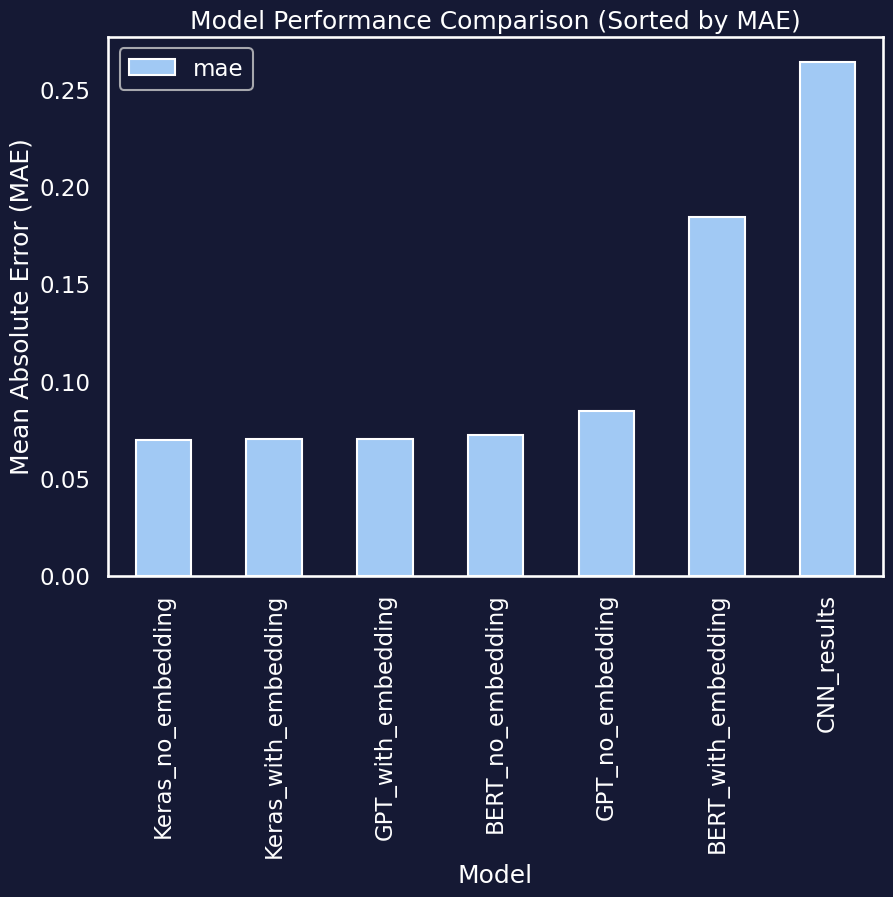

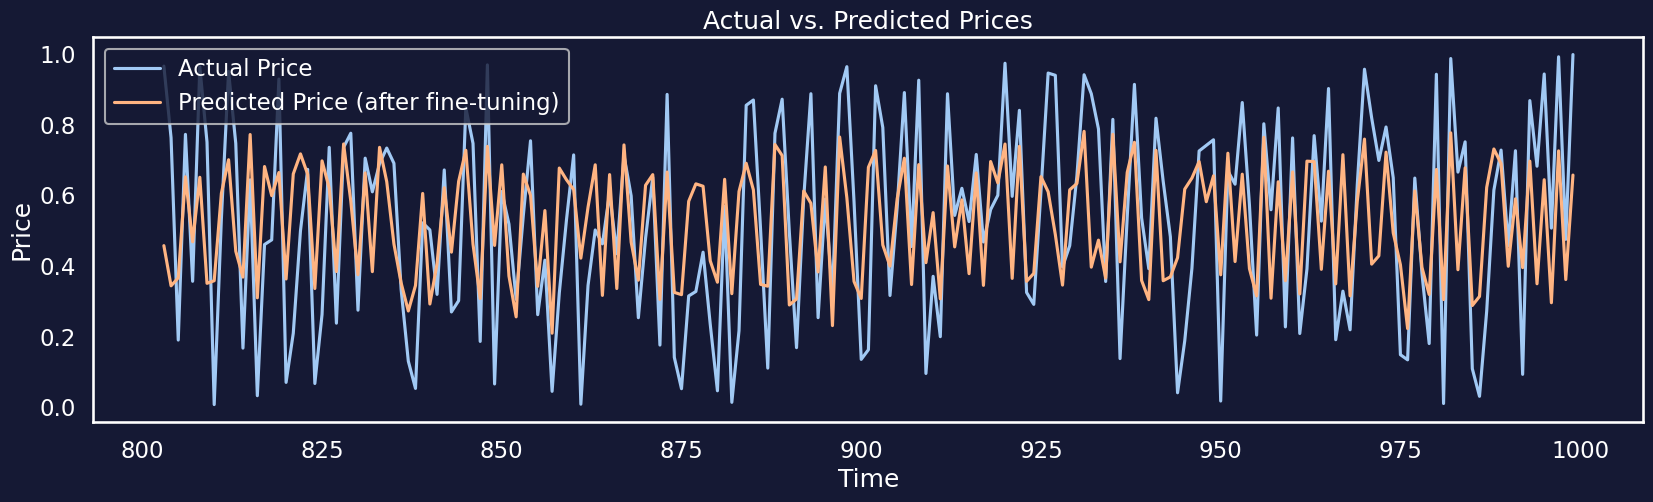

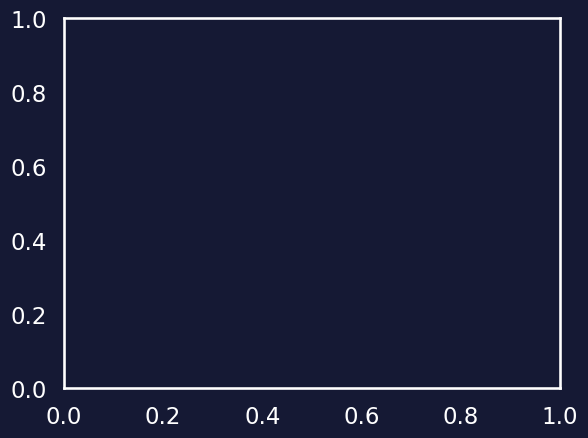

In [290]:
# Fine-tuning the BERT model
# Assuming you have already loaded the BERT model and tokenizer, and prepared your training and test datasets

# Freeze the first few layers of the BERT model to improve training efficiency
for layer in bert_model.layers[:6]:
    layer.trainable = False

# Compile the model with a lower learning rate for fine-tuning
combined_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-6), loss='mean_squared_error', metrics=['mae'])

# Train the model for a few more epochs with the new learning rate
history = combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the fine-tuned model on the test set
test_loss, test_mae = combined_model.evaluate([x_test_np, padded_corpus_test_np, attention_masks_test_np], y_test)
print(f'Test Mean Absolute Error after fine-tuning: {test_mae}')

# Predict on the test set with the fine-tuned model
predictions_BERT_fine_tuned = combined_model.predict([np.array(x_test_np), np.array(padded_corpus_test_np), np.array(attention_masks_test_np)])

# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results_fine_tuned = evaluate_preds(y_true=y_test, y_pred=predictions_BERT_fine_tuned)
print(BERT_dense_model_results_fine_tuned)

# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "Keras_with_embedding": model_results_with_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding,
    "BERT_no_embedding": bert_model_results,
    "BERT_with_embedding": BERT_dense_model_results_fine_tuned
}).T  # Transpose the DataFrame for easier plotting


# Print out all model results for comparison
print("Model Comparison Results:")
print(model_results)

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.title("Model Performance Comparison (Sorted by MAE)")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(False)
plt.show()

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_BERT_fine_tuned, format="-", label="Predicted Price (after fine-tuning)")
plt.show()
plt.grid(False)


In [291]:
model_results

mae       mse      rmse        mape      mase
CNN_results           0.263702  0.093645  0.306015  643.145874  0.719082
Keras_no_embedding    0.069717  0.006856  0.082804   55.960739  0.944539
Keras_with_embedding  0.070130  0.007621  0.087296   56.868393  0.913277
GPT_no_embedding      0.084543  0.010040  0.100198   73.044388  0.890841
GPT_with_embedding    0.070130  0.007621  0.087296   56.868393  0.913277
BERT_no_embedding     0.072155  0.007610  0.087238   47.561371  0.214017
BERT_with_embedding   0.184155  0.047237  0.217340  167.394928  0.546214

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
BERT + Dense Model Results: {'mae': 0.2849749, 'mse': 0.12350264, 'rmse': 0.35142943, 'mape': 279.40103, 'mase': 1.016895}
Model Comparison Results:
                           mae       mse      rmse        mape      mase
CNN_results           0.263702  0.093645  0.306015  643.145874  0.719082
Keras_no_embedding    0.069717  0.006856  0.082804   55.960739  0.944539
GPT_no_embedding      0.084543  0.010040  0.100198   73.044388  0.890841
Keras_with_embedding  0.070130  0.007621  0.087296   56.868393  0.913277
GPT_with_embedding    0.070130  0.007621  0.087296   56.868393  0.913277
BERT_no_embedding     0.072155  0.007610  0.087238   47.561371  0.214017
BERT_with_embedding   0.284975  0.123503  0.351429  279.401031  1.016895


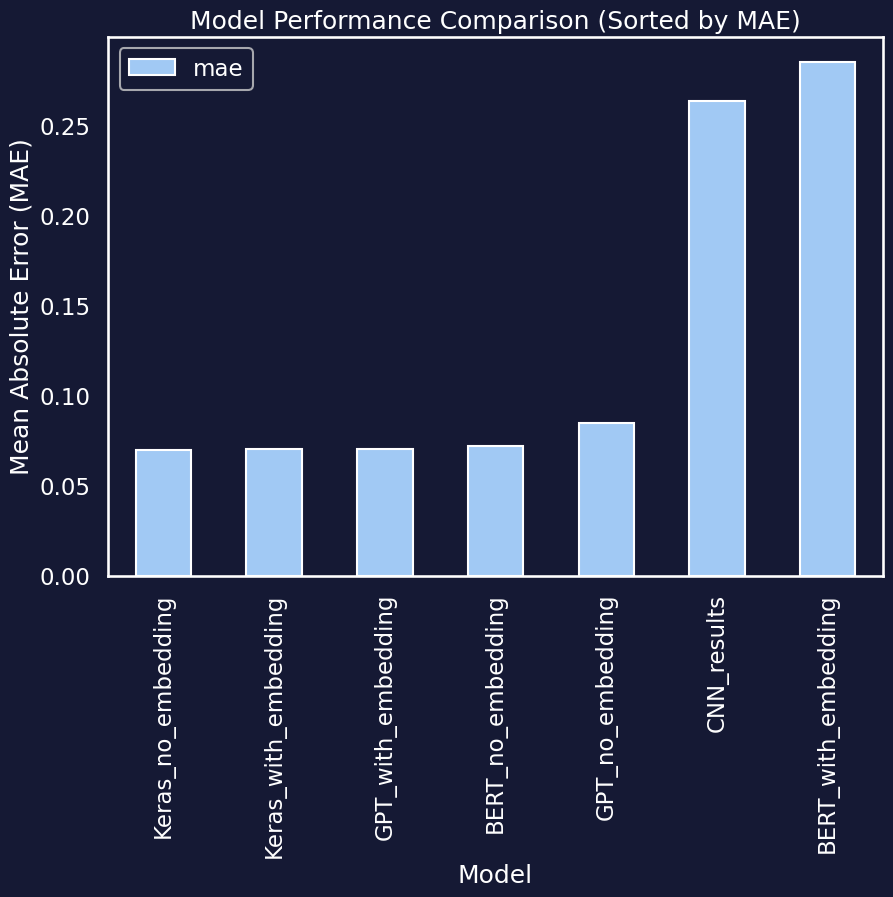

x_test shape: (197, 6)
padded_corpus_test shape: (197, 50)
attention_masks_test shape: (197, 50)
y_test shape: (197, 1)
x_test shape after adjustment: (197, 6)
padded_corpus_test shape after adjustment: (197, 50)
attention_masks_test shape after adjustment: (197, 50)
y_test shape after adjustment: (197, 1)


In [292]:
# prompt: write further code from here

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Step 1: Recalculate BERT embeddings for the test data (if not already done)
test_bert_embeddings = bert_feature_extractor([padded_corpus_test, attention_masks_test])

# Convert TensorFlow tensors to numpy arrays
test_bert_embeddings_np = test_bert_embeddings.numpy()

# Flatten BERT embeddings to combine with numerical inputs
test_bert_embeddings_flat = test_bert_embeddings_np.reshape(test_bert_embeddings_np.shape[0], -1)

# Step 2: Combine numerical features with BERT embeddings (same as during training)
x_test_combined = np.concatenate([x_test, test_bert_embeddings_flat], axis=1)

# Step 3: Make predictions using the combined test set
predictions_BERT = model.predict(x_test_combined)

# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT.flatten())
print(f'BERT + Dense Model Results: {BERT_dense_model_results}')


# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "Keras_with_embedding": model_results_with_embedding,
    "GPT_with_embedding": model_results_with_embedding,
    "BERT_no_embedding": bert_model_results,
    "BERT_with_embedding": BERT_dense_model_results,
}).T  # Transpose the DataFrame for easier plotting


# Print out all model results for comparison
print("Model Comparison Results:")
print(model_results)

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.title("Model Performance Comparison (Sorted by MAE)")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(False)
plt.show()

print(f"x_test shape: {x_test.shape}")
print(f"padded_corpus_test shape: {padded_corpus_test.shape}")
print(f"attention_masks_test shape: {attention_masks_test.shape}")
print(f"y_test shape: {y_test.shape}")

min_samples = len(x_test)  # or len(y_test), since they are equal in this case

# Adjust the arrays to match the minimum number of samples
padded_corpus_test = padded_corpus_test[:min_samples]
attention_masks_test = attention_masks_test[:min_samples]
y_test = y_test[:min_samples]

print(f"x_test shape after adjustment: {x_test.shape}")
print(f"padded_corpus_test shape after adjustment: {padded_corpus_test.shape}")
print(f"attention_masks_test shape after adjustment: {attention_masks_test.shape}")
print(f"y_test shape after adjustment: {y_test.shape}")


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - loss: 0.0485 - mae: 0.1851 - val_loss: 0.0441 - val_mae: 0.1727
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 221ms/step - loss: 0.0497 - mae: 0.1900 - val_loss: 0.0472 - val_mae: 0.1814
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - loss: 0.0481 - mae: 0.1824 - val_loss: 0.0441 - val_mae: 0.1732
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - loss: 0.0487 - mae: 0.1869 - val_loss: 0.0445 - val_mae: 0.1755
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - loss: 0.0492 - mae: 0.1878 - val_loss: 0.0440 - val_mae: 0.1743
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - loss: 0.0451 - mae: 0.1783 - val_loss: 0.0434 - val_mae: 0.1723
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - loss: 0.0436 - mae: 0.1758 - val_loss: 0.0431 - val_mae: 0.1714
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - loss: 0.0468 - mae: 0.1821 - val_loss: 0.0450 - val_mae: 0.1769
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - los

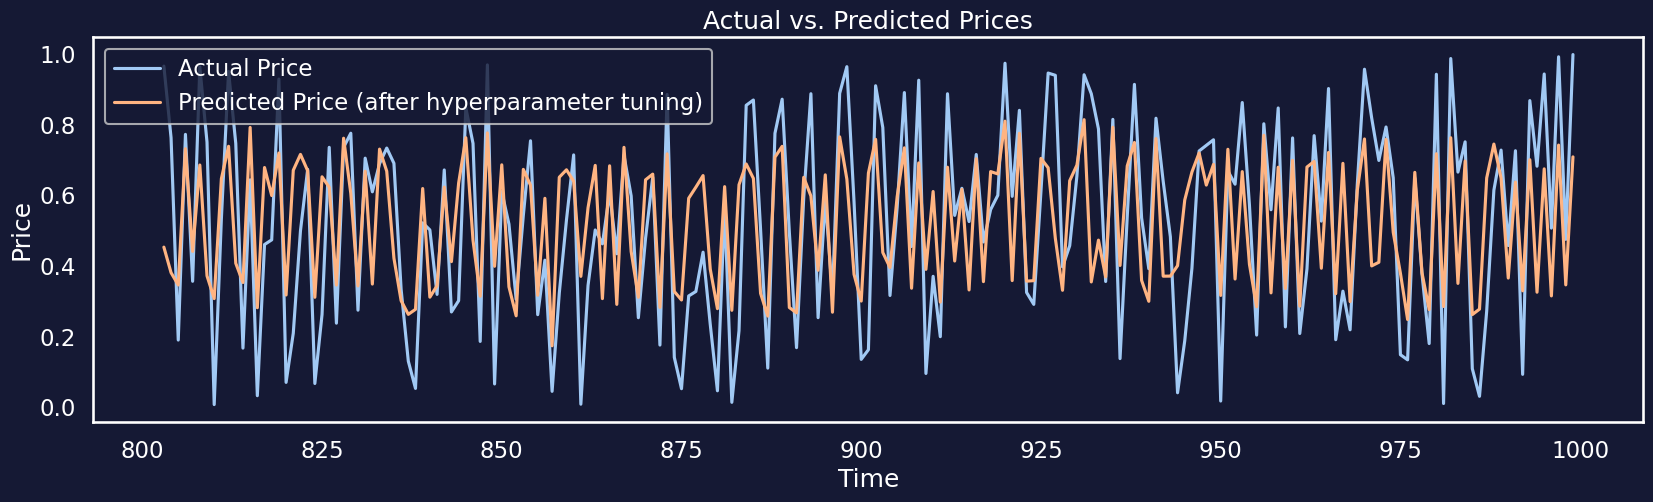

mae       mse      rmse        mape      mase
CNN_results           0.263702  0.093645  0.306015  643.145874  0.719082
Keras_no_embedding    0.069717  0.006856  0.082804   55.960739  0.944539
GPT_no_embedding      0.084543  0.010040  0.100198   73.044388  0.890841
Keras_with_embedding  0.070130  0.007621  0.087296   56.868393  0.913277
GPT_with_embedding    0.070130  0.007621  0.087296   56.868393  0.913277
BERT_no_embedding     0.072155  0.007610  0.087238   47.561371  0.214017
BERT_with_embedding   0.173343  0.042790  0.206857  148.345123  0.514144

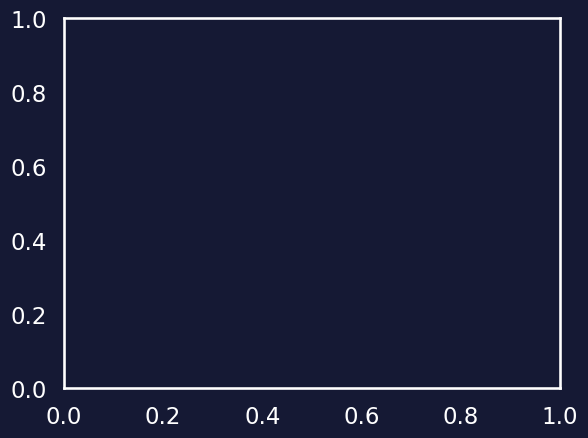

In [293]:
# prompt: write code from here for low mae change hyperparameter and learning rate

# Tune learning rate
learning_rate = 0.00005
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
combined_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Tune batch size
batch_size = 64
combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

# Tune number of epochs
epochs = 20
combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Tune other hyperparameters
# Experiment with different optimizers, such as RMSprop or Nadam
# Use techniques like early stopping and model checkpointing to avoid overfitting and track progress
# Consider using a different pre-trained BERT model with larger capacity
# Explore other feature extraction methods from the BERT model, such as using the hidden states at different layers
# Incorporate other types of information, such as sentiment analysis or topic modeling, into the model

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([x_test_np, padded_corpus_test_np, attention_masks_test_np], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_BERT = combined_model.predict([np.array(x_test_np), np.array(padded_corpus_test_np), np.array(attention_masks_test_np)])

# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
print(BERT_dense_model_results)

# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "Keras_with_embedding": model_results_with_embedding,
    "GPT_with_embedding": model_results_with_embedding,
    "BERT_no_embedding": bert_model_results,
    "BERT_with_embedding": BERT_dense_model_results
}).T  # Transpose the DataFrame for easier plotting

# Print out all model results for comparison
print("Model Comparison Results:")
print(model_results)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_BERT, format="-", label="Predicted Price (after hyperparameter tuning)")
plt.show()
plt.grid(False)

model_results


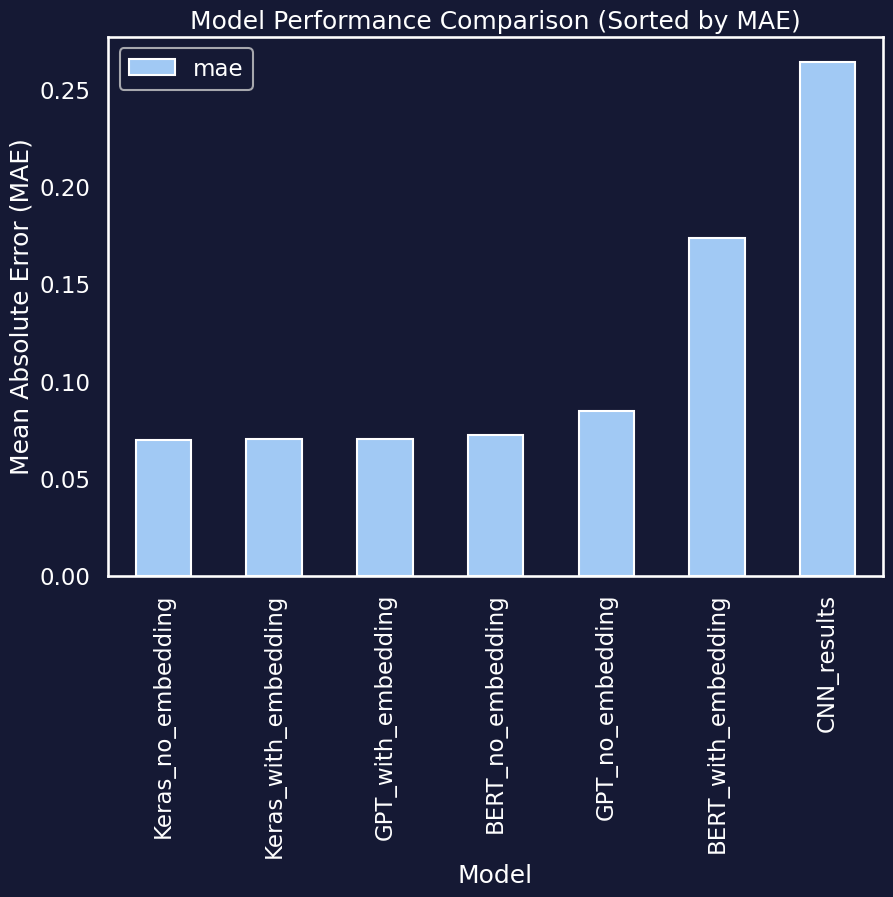

In [294]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.title("Model Performance Comparison (Sorted by MAE)")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(False)
plt.show()

In [295]:
model_results

mae       mse      rmse        mape      mase
CNN_results           0.263702  0.093645  0.306015  643.145874  0.719082
Keras_no_embedding    0.069717  0.006856  0.082804   55.960739  0.944539
GPT_no_embedding      0.084543  0.010040  0.100198   73.044388  0.890841
Keras_with_embedding  0.070130  0.007621  0.087296   56.868393  0.913277
GPT_with_embedding    0.070130  0.007621  0.087296   56.868393  0.913277
BERT_no_embedding     0.072155  0.007610  0.087238   47.561371  0.214017
BERT_with_embedding   0.173343  0.042790  0.206857  148.345123  0.514144